In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import _config

In [2]:
input_taz_shapefile_folder = _config.input_taz_shapefile_folder
taz_shapefile = _config.taz_shapefile
se_years = _config.se_years
input_model_se_folder = _config.input_model_se_folder
se_base_year = _config.se_base_year
df_centers = _config.df_centers
df_projects = _config.df_projects
df_emp_subcategories = _config.df_emp_subcategories

# Read in data from previous notebooks

In [3]:
df_se_data = pd.read_csv('intermediate/se_data.csv')
df_se_data

,TAZID,parameter,value_F,se_year_F
0,1,CO_TAZID,30001.0,2032
1,2,CO_TAZID,30002.0,2032
2,3,CO_TAZID,30003.0,2032
3,4,CO_TAZID,30004.0,2032
4,5,CO_TAZID,30005.0,2032
...,...,...,...,...
276583,3542,CO_FIPS,49.0,2050
276584,3543,CO_FIPS,49.0,2050
276585,3544,CO_FIPS,49.0,2050
276586,3545,CO_FIPS,49.0,2050


In [4]:
df_se_data_remove_emp_subtotals = df_se_data[~df_se_data['parameter'].isin(['TOTEMP','ALLEMP','INDEMP','RETEMP','OTHEMP'])]
df_se_data_remove_emp_subtotals

,TAZID,parameter,value_F,se_year_F
0,1,CO_TAZID,30001.0,2032
1,2,CO_TAZID,30002.0,2032
2,3,CO_TAZID,30003.0,2032
3,4,CO_TAZID,30004.0,2032
4,5,CO_TAZID,30005.0,2032
...,...,...,...,...
276583,3542,CO_FIPS,49.0,2050
276584,3543,CO_FIPS,49.0,2050
276585,3544,CO_FIPS,49.0,2050
276586,3545,CO_FIPS,49.0,2050


,N,project_id,nearest_AreaType,TAZID,TAZACRES,sqm,acres,pctu_ch,parameter,taz_ratio,...,s_ch,s_tot,s_diff,s_grow,b_tot_den,f_tot_den,s_tot_den,s_grow_den,s_diff_den,geometry
0,15086,2,Neighborhood Center,1472,42.036264,49740.404222,12.291122,0.776678,TOTEMP,0.238638,...,57.277477,97.353816,-82.101744,-75.738072,14.082676,14.600422,7.920662,-6.162015,-6.679760,"POLYGON ((424043.145 4505847.017, 424036.495 4..."
1,15086,2,Neighborhood Center,1472,42.036264,49740.404222,12.291122,0.776678,TOTEMP,0.238638,...,57.277477,98.828256,-87.229614,-74.263632,14.082676,15.137583,8.040621,-6.042055,-7.096961,"POLYGON ((424043.145 4505847.017, 424036.495 4..."
2,15086,2,Neighborhood Center,1472,42.036264,49740.404222,12.291122,0.776678,TOTEMP,0.238638,...,57.277477,100.204991,-92.017686,-72.886896,14.082676,15.639149,8.152632,-5.930044,-7.486517,"POLYGON ((424043.145 4505847.017, 424036.495 4..."
3,15086,2,Neighborhood Center,1473,44.089344,52165.559080,12.890390,1.000000,TOTEMP,0.327186,...,77.342342,77.342342,-168.865158,-139.145758,16.794534,19.100081,6.000000,-10.794534,-13.100081,"POLYGON ((424421.505 4505865.604, 424414.855 4..."
4,15086,2,Neighborhood Center,1473,44.089344,52165.559080,12.890390,1.000000,TOTEMP,0.327186,...,77.342342,77.342342,-206.764208,-139.145758,16.794534,22.040182,6.000000,-10.794534,-16.040182,"POLYGON ((424421.505 4505865.604, 424414.855 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,10046,1,Metropolitan Center,390,37.583728,146896.322244,36.298872,0.588706,TOTHHEMP,0.955593,...,2741.260726,3224.409990,2049.705394,2133.721166,30.047458,32.362014,88.829482,58.782024,56.467468,"POLYGON ((418169.004 4563560.006, 418123.854 4..."
1598,10046,1,Metropolitan Center,390,37.583728,146896.322244,36.298872,0.588706,TOTHHEMP,0.955593,...,2741.260726,3253.179792,2008.525760,2162.490968,30.047458,34.289056,89.622064,59.574606,55.333008,"POLYGON ((418169.004 4563560.006, 418123.854 4..."
1599,10046,1,Metropolitan Center,392,26.797133,55531.069672,13.722026,0.842694,TOTHHEMP,0.585085,...,1483.361568,1556.339883,1092.414482,1087.784511,34.146223,33.808812,113.419102,79.272878,79.610290,"POLYGON ((418384.296 4563850.293, 418366.563 4..."
1600,10046,1,Metropolitan Center,392,26.797133,55531.069672,13.722026,0.842694,TOTHHEMP,0.585085,...,1483.361568,1558.027850,1083.371994,1089.472478,34.146223,34.590799,113.542113,79.395890,78.951314,"POLYGON ((418384.296 4563850.293, 418366.563 4..."


<AxesSubplot:>

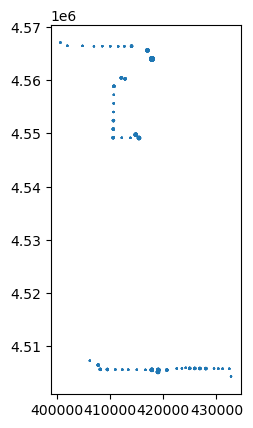

In [5]:
gdf_se_calcs2 = gpd.read_file("intermediate/se_calcs2.geojson")
display(gdf_se_calcs2)
gdf_se_calcs2.plot()

In [6]:
lst_project_taz = gdf_se_calcs2['TAZID'].drop_duplicates().tolist()
display(lst_project_taz)

[1472,
 1473,
 1481,
 1482,
 176,
 186,
 173,
 185,
 172,
 184,
 181,
 182,
 180,
 179,
 177,
 165,
 914,
 1303,
 1306,
 1354,
 1372,
 1355,
 1373,
 1356,
 1357,
 1375,
 1376,
 1358,
 1360,
 1377,
 1378,
 1363,
 1364,
 1379,
 1380,
 1469,
 1470,
 1479,
 1461,
 1480,
 1510,
 1511,
 1518,
 1519,
 1512,
 1520,
 1502,
 1521,
 1530,
 1531,
 1679,
 1503,
 663,
 675,
 680,
 681,
 665,
 666,
 614,
 615,
 618,
 619,
 604,
 605,
 609,
 610,
 514,
 515,
 521,
 522,
 497,
 498,
 500,
 501,
 502,
 307,
 308,
 310,
 1311,
 1315,
 1307,
 1310,
 1312,
 1316,
 1370,
 1371,
 1386,
 1387,
 1474,
 1475,
 1476,
 1483,
 1484,
 1485,
 1477,
 1478,
 1486,
 1487,
 1505,
 1506,
 1513,
 1514,
 1301,
 1507,
 1508,
 1515,
 1516,
 1517,
 674,
 679,
 668,
 669,
 671,
 672,
 595,
 596,
 600,
 601,
 473,
 499,
 503,
 506,
 507,
 508,
 468,
 657,
 658,
 664,
 339,
 340,
 351,
 352,
 1365,
 1366,
 1381,
 1382,
 660,
 702,
 703,
 709,
 1367,
 1368,
 1383,
 1384,
 1396,
 367,
 368,
 369,
 370,
 371,
 372,
 388,
 389,
 390

# Proportionally remove added growth from other TAZs in county to maintain totals

In [7]:
gdf_se_calcs2_grouped = gdf_se_calcs2[['TAZID','parameter','se_year_F','center_type','s_ch','f_ch']].groupby(['TAZID','se_year_F','parameter','center_type'], as_index=False).sum()
gdf_se_calcs2_grouped

,TAZID,se_year_F,parameter,center_type,s_ch,f_ch
0,165,2032,TOTEMP,Neighborhood Center,0.000000,0.000000
1,165,2032,TOTHH,Neighborhood Center,0.000000,0.000000
2,165,2032,TOTHHEMP,Neighborhood Center,0.000000,0.000000
3,165,2042,TOTEMP,Neighborhood Center,0.000000,0.000000
4,165,2042,TOTHH,Neighborhood Center,0.000000,0.000000
...,...,...,...,...,...,...
1435,1679,2042,TOTHH,Neighborhood Center,42.872068,0.105007
1436,1679,2042,TOTHHEMP,Neighborhood Center,60.592523,0.113407
1437,1679,2050,TOTEMP,Neighborhood Center,14.290689,0.000000
1438,1679,2050,TOTHH,Neighborhood Center,42.872068,0.107826


In [8]:
# get employment categories splits for region

df_emp_cat = pd.DataFrame([
    ['RETEMP','RETL'],
    ['RETEMP','FOOD'],
    ['OTHEMP','OFFI'],
    ['OTHEMP','GVED'],
    ['OTHEMP','HLTH'],
    ['OTHEMP','OTHR'],
    ['INDEMP','MANU'],
    ['INDEMP','WSLE'],
], columns=['EMP3CAT','parameter'])
display(df_emp_cat)

df_se_data_emp3cat = pd.merge(df_se_data_remove_emp_subtotals, df_emp_cat, on='parameter')
display(df_se_data_emp3cat)

,EMP3CAT,parameter
0,RETEMP,RETL
1,RETEMP,FOOD
2,OTHEMP,OFFI
3,OTHEMP,GVED
4,OTHEMP,HLTH
5,OTHEMP,OTHR
6,INDEMP,MANU
7,INDEMP,WSLE


,TAZID,parameter,value_F,se_year_F,EMP3CAT
0,1,RETL,0.0,2032,RETEMP
1,2,RETL,0.0,2032,RETEMP
2,3,RETL,0.0,2032,RETEMP
3,4,RETL,0.0,2032,RETEMP
4,5,RETL,0.4,2032,RETEMP
...,...,...,...,...,...
85099,3542,OTHR,0.0,2050,OTHEMP
85100,3543,OTHR,0.0,2050,OTHEMP
85101,3544,OTHR,0.0,2050,OTHEMP
85102,3545,OTHR,0.0,2050,OTHEMP


In [9]:
df_se_data_emp8cat_total = df_se_data_emp3cat.drop(columns=['TAZID']).groupby(['se_year_F','parameter','EMP3CAT'], as_index=False).sum().rename(columns={'value_F':'emp8'})
display(df_se_data_emp8cat_total)

df_se_data_emp3cat_total = df_se_data_emp3cat.drop(columns=['TAZID','parameter']).groupby(['se_year_F','EMP3CAT'], as_index=False).sum().rename(columns={'value_F':'emp3'})
display(df_se_data_emp3cat_total)

,se_year_F,parameter,EMP3CAT,emp8
0,2032,FOOD,RETEMP,118684.0
1,2032,GVED,OTHEMP,307869.0
2,2032,HLTH,OTHEMP,187136.4
3,2032,MANU,INDEMP,134557.8
4,2032,OFFI,OTHEMP,280360.2
5,2032,OTHR,OTHEMP,513247.4
6,2032,RETL,RETEMP,165488.2
7,2032,WSLE,INDEMP,148138.6
8,2042,FOOD,RETEMP,123913.8
9,2042,GVED,OTHEMP,335164.4


,se_year_F,EMP3CAT,emp3
0,2032,INDEMP,282696.4
1,2032,OTHEMP,1288613.0
2,2032,RETEMP,284172.2
3,2042,INDEMP,280782.7
4,2042,OTHEMP,1451160.4
5,2042,RETEMP,322919.3
6,2050,INDEMP,279022.1
7,2050,OTHEMP,1574380.9
8,2050,RETEMP,364175.1


In [10]:
df_se_data_emp_portions = pd.merge(df_se_data_emp3cat_total, df_se_data_emp8cat_total, on=('se_year_F','EMP3CAT'))
df_se_data_emp_portions['emp8portion3'] = df_se_data_emp_portions['emp8'] / df_se_data_emp_portions['emp3']
df_se_data_emp_portions.rename(columns={'parameter':'EMP8CAT'}, inplace=True)
df_se_data_emp_portions.drop(columns=['emp3','emp8'], inplace=True)
df_se_data_emp_portions

,se_year_F,EMP3CAT,EMP8CAT,emp8portion3
0,2032,INDEMP,MANU,0.475980
1,2032,INDEMP,WSLE,0.524020
2,2032,OTHEMP,GVED,0.238915
3,2032,OTHEMP,HLTH,0.145223
4,2032,OTHEMP,OFFI,0.217567
5,2032,OTHEMP,OTHR,0.398294
6,2032,RETEMP,FOOD,0.417648
7,2032,RETEMP,RETL,0.582352
8,2042,INDEMP,MANU,0.501159
9,2042,INDEMP,WSLE,0.498841


In [11]:
df_centers[['office', 'retail']] = df_centers['office_retail_split'].str.split("/", expand=True)

# Convert the new columns to numeric types
df_centers['OTHEMP'] = pd.to_numeric(df_centers['office'])
df_centers['RETEMP'] = pd.to_numeric(df_centers['retail'])

# Divide the columns by 100
df_centers['OTHEMP'] = df_centers['OTHEMP'] / 100
df_centers['RETEMP'] = df_centers['RETEMP'] / 100

df_centers_office_retail = pd.melt(df_centers, id_vars=['center_type'], value_vars=['OTHEMP', 'RETEMP'], 
                                   var_name='EMP3CAT', value_name='split')

df_centers_office_retail

,center_type,EMP3CAT,split
0,Neighborhood Center,OTHEMP,0.2
1,City Center,OTHEMP,0.3
2,Urban Center,OTHEMP,0.4
3,Metropolitan Center,OTHEMP,0.5
4,Neighborhood Center,RETEMP,0.8
5,City Center,RETEMP,0.7
6,Urban Center,RETEMP,0.6
7,Metropolitan Center,RETEMP,0.5


# Add Employment

In [12]:
df_emp_add = gdf_se_calcs2_grouped[(gdf_se_calcs2_grouped['parameter']=='TOTEMP')].copy()
df_emp_add.drop(columns=['f_ch'], inplace = True)
df_emp_add = df_emp_add[df_emp_add['parameter']=='TOTEMP'].copy()
df_emp_add.drop(columns=['parameter'], inplace=True)
df_emp_add

,TAZID,se_year_F,center_type,s_ch
0,165,2032,Neighborhood Center,0.000000
3,165,2042,Neighborhood Center,0.000000
6,165,2050,Neighborhood Center,0.000000
9,172,2032,Neighborhood Center,0.000000
12,172,2042,Neighborhood Center,0.000000
...,...,...,...,...
1425,1531,2042,Neighborhood Center,100.156232
1428,1531,2050,Neighborhood Center,100.156232
1431,1679,2032,Neighborhood Center,14.290689
1434,1679,2042,Neighborhood Center,14.290689


In [13]:
df_emp_add.groupby(['se_year_F']).sum()

,TAZID,s_ch
se_year_F,,
2032,152856,20005.133482
2042,152856,20005.133482
2050,152856,20005.133482


In [14]:
df_emp_add_3split = pd.merge(df_emp_add, df_centers_office_retail, on='center_type')
df_emp_add_3split['s_ch_emp3'] = df_emp_add_3split['s_ch'] * df_emp_add_3split['split']
df_emp_add_3split

,TAZID,se_year_F,center_type,s_ch,EMP3CAT,split,s_ch_emp3
0,165,2032,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000
1,165,2032,Neighborhood Center,0.000000,RETEMP,0.8,0.000000
2,165,2042,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000
3,165,2042,Neighborhood Center,0.000000,RETEMP,0.8,0.000000
4,165,2050,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000
...,...,...,...,...,...,...,...
955,392,2032,Metropolitan Center,346.904015,RETEMP,0.5,173.452008
956,392,2042,Metropolitan Center,346.904015,OTHEMP,0.5,173.452008
957,392,2042,Metropolitan Center,346.904015,RETEMP,0.5,173.452008
958,392,2050,Metropolitan Center,346.904015,OTHEMP,0.5,173.452008


In [15]:
df_emp_add_3split.groupby(['se_year_F']).sum()

,TAZID,s_ch,split,s_ch_emp3
se_year_F,,,,
2032,305712,40010.266964,160.0,20005.133482
2042,305712,40010.266964,160.0,20005.133482
2050,305712,40010.266964,160.0,20005.133482


In [16]:
df_emp_add_3split_8split = pd.merge(df_emp_add_3split, df_se_data_emp_portions, on=('se_year_F','EMP3CAT'))
df_emp_add_3split_8split['s_ch_cat8emp'] = df_emp_add_3split_8split['s_ch_emp3'] * df_emp_add_3split_8split['emp8portion3']
df_emp_add_3split_8split

,TAZID,se_year_F,center_type,s_ch,EMP3CAT,split,s_ch_emp3,EMP8CAT,emp8portion3,s_ch_cat8emp
0,165,2032,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000,GVED,0.238915,0.000000
1,165,2032,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000,HLTH,0.145223,0.000000
2,165,2032,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000,OFFI,0.217567,0.000000
3,165,2032,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000,OTHR,0.398294,0.000000
4,172,2032,Neighborhood Center,0.000000,OTHEMP,0.2,0.000000,GVED,0.238915,0.000000
...,...,...,...,...,...,...,...,...,...,...
2875,389,2050,Metropolitan Center,5.420407,RETEMP,0.5,2.710204,RETL,0.620659,1.682113
2876,390,2050,Metropolitan Center,641.080619,RETEMP,0.5,320.540309,FOOD,0.379341,121.593952
2877,390,2050,Metropolitan Center,641.080619,RETEMP,0.5,320.540309,RETL,0.620659,198.946357
2878,392,2050,Metropolitan Center,346.904015,RETEMP,0.5,173.452008,FOOD,0.379341,65.797388


In [17]:
df_emp_add_3split_8split.groupby(['se_year_F']).sum()

,TAZID,s_ch,split,s_ch_emp3,emp8portion3,s_ch_cat8emp
se_year_F,,,,,,
2032,917136,120030.800893,410.4,54410.172223,320.0,20005.133482
2042,917136,120030.800893,410.4,54410.172223,320.0,20005.133482
2050,917136,120030.800893,410.4,54410.172223,320.0,20005.133482


In [18]:
df_emp_add_3split_8split_taz = df_emp_add_3split_8split[['TAZID','se_year_F','EMP3CAT','EMP8CAT','s_ch_cat8emp']].groupby(['TAZID','se_year_F','EMP3CAT','EMP8CAT'], as_index=False).sum()
df_emp_add_3split_8split_taz

,TAZID,se_year_F,EMP3CAT,EMP8CAT,s_ch_cat8emp
0,165,2032,OTHEMP,GVED,0.000000
1,165,2032,OTHEMP,HLTH,0.000000
2,165,2032,OTHEMP,OFFI,0.000000
3,165,2032,OTHEMP,OTHR,0.000000
4,165,2032,RETEMP,FOOD,0.000000
...,...,...,...,...,...
2785,1679,2050,OTHEMP,HLTH,0.454212
2786,1679,2050,OTHEMP,OFFI,0.681874
2787,1679,2050,OTHEMP,OTHR,1.065789
2788,1679,2050,RETEMP,FOOD,4.336831


In [19]:
df_emp_add_3split_8split_taz.groupby(['se_year_F']).sum()

,TAZID,s_ch_cat8emp
se_year_F,,
2032,893196,20005.133482
2042,893196,20005.133482
2050,893196,20005.133482


In [20]:
# add subotals
df_emp_add_with_subtotals = pd.merge(df_emp_add_3split_8split_taz, df_emp_subcategories, left_on='EMP8CAT', right_on='EMPCAT')
df_emp_add_with_subtotals

,TAZID,se_year_F,EMP3CAT,EMP8CAT,s_ch_cat8emp,EMPGROUP,EMPCAT,SUB03,SUB08,SUB11,BASE08,BASE11
0,165,2032,OTHEMP,GVED,0.000000,OTHEMP,GVED,1,0,0,0,0
1,165,2032,OTHEMP,GVED,0.000000,TOTEMP,GVED,0,1,0,0,0
2,165,2032,OTHEMP,GVED,0.000000,ALLEMP,GVED,0,0,1,0,0
3,165,2032,OTHEMP,GVED,0.000000,GVED,GVED,0,0,0,1,1
4,165,2042,OTHEMP,GVED,0.000000,OTHEMP,GVED,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11155,1679,2042,RETEMP,RETL,7.045539,RETL,RETL,0,0,0,1,1
11156,1679,2050,RETEMP,RETL,7.095721,RETEMP,RETL,1,0,0,0,0
11157,1679,2050,RETEMP,RETL,7.095721,TOTEMP,RETL,0,1,0,0,0
11158,1679,2050,RETEMP,RETL,7.095721,ALLEMP,RETL,0,0,1,0,0


In [21]:
df_emp_add_final = df_emp_add_with_subtotals[['TAZID','se_year_F','EMPGROUP','s_ch_cat8emp']].groupby(['TAZID','se_year_F','EMPGROUP'], as_index=False).sum()
df_emp_add_final

,TAZID,se_year_F,EMPGROUP,s_ch_cat8emp
0,165,2032,ALLEMP,0.000000
1,165,2032,FOOD,0.000000
2,165,2032,GVED,0.000000
3,165,2032,HLTH,0.000000
4,165,2032,OFFI,0.000000
...,...,...,...,...
4645,1679,2050,OTHEMP,2.858138
4646,1679,2050,OTHR,1.065789
4647,1679,2050,RETEMP,11.432551
4648,1679,2050,RETL,7.095721


In [22]:
df_emp_add_final[df_emp_add_final['EMPGROUP']=='TOTEMP'].groupby(['se_year_F']).sum()

,TAZID,s_ch_cat8emp
se_year_F,,
2032,148866,20005.133482
2042,148866,20005.133482
2050,148866,20005.133482


# Remove employment

In [23]:
df_emp_del = gdf_se_calcs2_grouped[(gdf_se_calcs2_grouped['parameter']=='TOTEMP')].copy()
df_emp_del.drop(columns=['s_ch'], inplace = True)
df_emp_del = df_emp_del[df_emp_del['parameter']=='TOTEMP'].copy()
df_emp_del.drop(columns=['parameter'], inplace=True)
df_emp_del

,TAZID,se_year_F,center_type,f_ch
0,165,2032,Neighborhood Center,0.000000
3,165,2042,Neighborhood Center,0.000000
6,165,2050,Neighborhood Center,0.000000
9,172,2032,Neighborhood Center,0.000000
12,172,2042,Neighborhood Center,0.000000
...,...,...,...,...
1425,1531,2042,Neighborhood Center,194.826891
1428,1531,2050,Neighborhood Center,198.024859
1431,1679,2032,Neighborhood Center,0.000000
1434,1679,2042,Neighborhood Center,0.000000


In [24]:
df_emp_del[df_emp_del['TAZID']==1384]

,TAZID,se_year_F,center_type,f_ch
1044,1384,2032,Urban Center,1122.970667
1047,1384,2042,Urban Center,1867.317681
1050,1384,2050,Urban Center,1940.419352


In [25]:
df_emp_sub08 = df_emp_subcategories[df_emp_subcategories['SUB08']==1]
df_emp_sub08

,EMPGROUP,EMPCAT,SUB03,SUB08,SUB11,BASE08,BASE11
8,TOTEMP,RETL,0,1,0,0,0
9,TOTEMP,FOOD,0,1,0,0,0
10,TOTEMP,MANU,0,1,0,0,0
11,TOTEMP,WSLE,0,1,0,0,0
12,TOTEMP,OFFI,0,1,0,0,0
13,TOTEMP,GVED,0,1,0,0,0
14,TOTEMP,OTHR,0,1,0,0,0
15,TOTEMP,HLTH,0,1,0,0,0


In [26]:
# add subotals
df_se_data_totemp = df_se_data[df_se_data['parameter']=='TOTEMP'].copy()
df_se_data_totemp.rename(columns={'value_F':'value_F_TOTEMP','parameter':'EMPGROUP'}, inplace=True)
df_se_data_totemp

,TAZID,EMPGROUP,value_F_TOTEMP,se_year_F
14184,1,TOTEMP,0.0,2032
14185,2,TOTEMP,0.0,2032
14186,3,TOTEMP,0.0,2032
14187,4,TOTEMP,0.0,2032
14188,5,TOTEMP,7.3,2032
...,...,...,...,...
202117,3542,TOTEMP,0.0,2050
202118,3543,TOTEMP,0.0,2050
202119,3544,TOTEMP,0.0,2050
202120,3545,TOTEMP,0.0,2050


In [27]:
df_se_data_cat8emp = pd.merge(df_se_data, df_emp_sub08, left_on='parameter', right_on='EMPCAT')
df_se_data_cat8emp

,TAZID,parameter,value_F,se_year_F,EMPGROUP,EMPCAT,SUB03,SUB08,SUB11,BASE08,BASE11
0,1,RETL,0.0,2032,TOTEMP,RETL,0,1,0,0,0
1,2,RETL,0.0,2032,TOTEMP,RETL,0,1,0,0,0
2,3,RETL,0.0,2032,TOTEMP,RETL,0,1,0,0,0
3,4,RETL,0.0,2032,TOTEMP,RETL,0,1,0,0,0
4,5,RETL,0.4,2032,TOTEMP,RETL,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
85099,3542,OTHR,0.0,2050,TOTEMP,OTHR,0,1,0,0,0
85100,3543,OTHR,0.0,2050,TOTEMP,OTHR,0,1,0,0,0
85101,3544,OTHR,0.0,2050,TOTEMP,OTHR,0,1,0,0,0
85102,3545,OTHR,0.0,2050,TOTEMP,OTHR,0,1,0,0,0


In [28]:
df_se_data_cat8empPortionTotEmp = pd.merge(df_se_data_cat8emp, df_se_data_totemp, on=['TAZID','se_year_F','EMPGROUP'])
df_se_data_cat8empPortionTotEmp['cat8empPortionTotEmp'] = df_se_data_cat8empPortionTotEmp['value_F'] / df_se_data_cat8empPortionTotEmp['value_F_TOTEMP']
df_se_data_cat8empPortionTotEmp['cat8empPortionTotEmp'].fillna(0, inplace=True)
df_se_data_cat8empPortionTotEmp = df_se_data_cat8empPortionTotEmp[['se_year_F','TAZID','parameter','cat8empPortionTotEmp']]
df_se_data_cat8empPortionTotEmp

,se_year_F,TAZID,parameter,cat8empPortionTotEmp
0,2032,1,RETL,0.0
1,2032,1,FOOD,0.0
2,2032,1,MANU,0.0
3,2032,1,WSLE,0.0
4,2032,1,OFFI,0.0
...,...,...,...,...
85099,2050,3546,WSLE,0.0
85100,2050,3546,OFFI,0.0
85101,2050,3546,GVED,0.0
85102,2050,3546,HLTH,0.0


In [29]:
df_se_data_cat8empPortionTotEmp.groupby(['se_year_F'], as_index=False).sum()

,se_year_F,TAZID,cat8empPortionTotEmp
0,2032,50310648,2587.0
1,2042,50310648,2652.0
2,2050,50310648,2706.0


In [30]:
df_emp_del_with_portion = pd.merge(df_emp_del, df_se_data_cat8empPortionTotEmp, on=['se_year_F','TAZID'])
df_emp_del_with_portion['f_ch_cat8emp'] = df_emp_del_with_portion['f_ch'] * df_emp_del_with_portion['cat8empPortionTotEmp']
df_emp_del_with_portion

,TAZID,se_year_F,center_type,f_ch,parameter,cat8empPortionTotEmp,f_ch_cat8emp
0,165,2032,Neighborhood Center,0.0,RETL,0.000000,0.0
1,165,2032,Neighborhood Center,0.0,FOOD,0.000226,0.0
2,165,2032,Neighborhood Center,0.0,MANU,0.784859,0.0
3,165,2032,Neighborhood Center,0.0,WSLE,0.002260,0.0
4,165,2032,Neighborhood Center,0.0,OFFI,0.001582,0.0
...,...,...,...,...,...,...,...
3835,1679,2050,Neighborhood Center,0.0,WSLE,0.072289,0.0
3836,1679,2050,Neighborhood Center,0.0,OFFI,0.000000,0.0
3837,1679,2050,Neighborhood Center,0.0,GVED,0.000000,0.0
3838,1679,2050,Neighborhood Center,0.0,HLTH,0.000000,0.0


In [31]:
df_emp_del_with_portion.groupby('se_year_F').sum()

,TAZID,f_ch,cat8empPortionTotEmp,f_ch_cat8emp
se_year_F,,,,
2032,1222848,159598.026926,147.0,19949.753366
2042,1222848,174672.913143,150.0,21834.114143
2050,1222848,177000.779286,150.0,22125.097411


In [32]:
df_emp_subcategories

,EMPGROUP,EMPCAT,SUB03,SUB08,SUB11,BASE08,BASE11
0,RETEMP,RETL,1,0,0,0,0
1,RETEMP,FOOD,1,0,0,0,0
2,INDEMP,MANU,1,0,0,0,0
3,INDEMP,WSLE,1,0,0,0,0
4,OTHEMP,OFFI,1,0,0,0,0
5,OTHEMP,GVED,1,0,0,0,0
6,OTHEMP,OTHR,1,0,0,0,0
7,OTHEMP,HLTH,1,0,0,0,0
8,TOTEMP,RETL,0,1,0,0,0
9,TOTEMP,FOOD,0,1,0,0,0


In [33]:
df_emp_del_with_subtotals = pd.merge(df_emp_del_with_portion, df_emp_subcategories[['EMPGROUP','EMPCAT']], left_on='parameter', right_on='EMPCAT')
df_emp_del_with_subtotals

,TAZID,se_year_F,center_type,f_ch,parameter,cat8empPortionTotEmp,f_ch_cat8emp,EMPGROUP,EMPCAT
0,165,2032,Neighborhood Center,0.0,RETL,0.000000,0.0,RETEMP,RETL
1,165,2032,Neighborhood Center,0.0,RETL,0.000000,0.0,TOTEMP,RETL
2,165,2032,Neighborhood Center,0.0,RETL,0.000000,0.0,ALLEMP,RETL
3,165,2032,Neighborhood Center,0.0,RETL,0.000000,0.0,RETL,RETL
4,165,2042,Neighborhood Center,0.0,RETL,0.000000,0.0,RETEMP,RETL
...,...,...,...,...,...,...,...,...,...
15355,1679,2042,Neighborhood Center,0.0,OTHR,0.927711,0.0,OTHR,OTHR
15356,1679,2050,Neighborhood Center,0.0,OTHR,0.927711,0.0,OTHEMP,OTHR
15357,1679,2050,Neighborhood Center,0.0,OTHR,0.927711,0.0,TOTEMP,OTHR
15358,1679,2050,Neighborhood Center,0.0,OTHR,0.927711,0.0,ALLEMP,OTHR


In [34]:
df_emp_del_final = df_emp_del_with_subtotals[['TAZID','se_year_F','EMPGROUP','f_ch_cat8emp']].groupby(['TAZID','se_year_F','EMPGROUP'], as_index=False).sum()
df_emp_del_final

,TAZID,se_year_F,EMPGROUP,f_ch_cat8emp
0,165,2032,ALLEMP,0.0
1,165,2032,FOOD,0.0
2,165,2032,GVED,0.0
3,165,2032,HLTH,0.0
4,165,2032,INDEMP,0.0
...,...,...,...,...
6040,1679,2050,OTHR,0.0
6041,1679,2050,RETEMP,0.0
6042,1679,2050,RETL,0.0
6043,1679,2050,TOTEMP,0.0


In [35]:
df_emp_del_final[df_emp_del_final['EMPGROUP']=='TOTEMP'].groupby(['se_year_F'], as_index=False).sum()

,se_year_F,TAZID,f_ch_cat8emp
0,2032,148866,19949.753366
1,2042,148866,21834.114143
2,2050,148866,22125.097411


In [36]:
df_se_data[(df_se_data['TAZID']==1384) & (df_se_data['se_year_F']==2050)]

,TAZID,parameter,value_F,se_year_F
185775,1384,CO_TAZID,350479.000000,2050
189321,1384,TOTHH,340.166667,2050
192867,1384,HHPOP,799.281059,2050
196413,1384,HHSIZE,2.349675,2050
199959,1384,TOTEMP,3008.333333,2050
203505,1384,RETEMP,1553.833333,2050
207051,1384,INDEMP,75.666667,2050
210597,1384,OTHEMP,1378.833333,2050
214143,1384,ALLEMP,3218.713388,2050
217689,1384,RETL,986.000000,2050


In [37]:
df_emp_del_final[df_emp_del_final['TAZID']==1384]

,TAZID,se_year_F,EMPGROUP,f_ch_cat8emp
4329,1384,2032,ALLEMP,1122.970667
4330,1384,2032,FOOD,346.265414
4331,1384,2032,GVED,7.095162
4332,1384,2032,HLTH,0.430010
4333,1384,2032,INDEMP,61.383903
4334,1384,2032,MANU,1.505034
4335,1384,2032,OFFI,120.295250
4336,1384,2032,OTHEMP,272.088719
4337,1384,2032,OTHR,144.268297
4338,1384,2032,RETEMP,789.498045


# Finish up employment

In [38]:
df_emp_changes = pd.merge(df_emp_add_final, df_emp_del_final, on=['TAZID','se_year_F','EMPGROUP'], how='outer')
df_emp_changes[['s_ch_cat8emp','f_ch_cat8emp']] = df_emp_changes[['s_ch_cat8emp','f_ch_cat8emp']].fillna(0)
df_emp_changes

,TAZID,se_year_F,EMPGROUP,s_ch_cat8emp,f_ch_cat8emp
0,165,2032,ALLEMP,0.0,0.0
1,165,2032,FOOD,0.0,0.0
2,165,2032,GVED,0.0,0.0
3,165,2032,HLTH,0.0,0.0
4,165,2032,OFFI,0.0,0.0
...,...,...,...,...,...
6040,1679,2042,MANU,0.0,0.0
6041,1679,2042,WSLE,0.0,0.0
6042,1679,2050,INDEMP,0.0,0.0
6043,1679,2050,MANU,0.0,0.0


In [39]:
df_emp_changes[df_emp_changes['EMPGROUP']=='TOTEMP'].groupby(['se_year_F']).sum()

,TAZID,s_ch_cat8emp,f_ch_cat8emp
se_year_F,,,
2032,148866,20005.133482,19949.753366
2042,148866,20005.133482,21834.114143
2050,148866,20005.133482,22125.097411


In [40]:
df_emp_changes['final_ch'] = -1 * df_emp_changes['f_ch_cat8emp'] + df_emp_changes['s_ch_cat8emp']
df_emp_changes.rename(columns={'EMPGROUP':'parameter'}, inplace=True)
df_emp_changes

,TAZID,se_year_F,parameter,s_ch_cat8emp,f_ch_cat8emp,final_ch
0,165,2032,ALLEMP,0.0,0.0,0.0
1,165,2032,FOOD,0.0,0.0,0.0
2,165,2032,GVED,0.0,0.0,0.0
3,165,2032,HLTH,0.0,0.0,0.0
4,165,2032,OFFI,0.0,0.0,0.0
...,...,...,...,...,...,...
6040,1679,2042,MANU,0.0,0.0,0.0
6041,1679,2042,WSLE,0.0,0.0,0.0
6042,1679,2050,INDEMP,0.0,0.0,0.0
6043,1679,2050,MANU,0.0,0.0,0.0


In [41]:
df_emp_changes[df_emp_changes['parameter']=='TOTEMP'].groupby(['se_year_F']).sum()

,TAZID,s_ch_cat8emp,f_ch_cat8emp,final_ch
se_year_F,,,,
2032,148866,20005.133482,19949.753366,55.380116
2042,148866,20005.133482,21834.114143,-1828.980661
2050,148866,20005.133482,22125.097411,-2119.963929


In [42]:
df_se_data

,TAZID,parameter,value_F,se_year_F
0,1,CO_TAZID,30001.0,2032
1,2,CO_TAZID,30002.0,2032
2,3,CO_TAZID,30003.0,2032
3,4,CO_TAZID,30004.0,2032
4,5,CO_TAZID,30005.0,2032
...,...,...,...,...
276583,3542,CO_FIPS,49.0,2050
276584,3543,CO_FIPS,49.0,2050
276585,3544,CO_FIPS,49.0,2050
276586,3545,CO_FIPS,49.0,2050


In [43]:
df_se_data_with_emp_changes = pd.merge(df_se_data, df_emp_changes, on=['se_year_F','TAZID','parameter'])
df_se_data_with_emp_changes['value_S'] = round(df_se_data_with_emp_changes['value_F'] + df_se_data_with_emp_changes['final_ch'],4)
df_se_data_with_emp_changes

,TAZID,parameter,value_F,se_year_F,s_ch_cat8emp,f_ch_cat8emp,final_ch,value_S
0,165,TOTEMP,737.500000,2032,0.000000,0.000000,0.000000,737.5000
1,172,TOTEMP,0.000000,2032,0.000000,0.000000,0.000000,0.0000
2,173,TOTEMP,0.000000,2032,0.000000,0.000000,0.000000,0.0000
3,176,TOTEMP,0.000000,2032,0.000000,0.000000,0.000000,0.0000
4,177,TOTEMP,0.000000,2032,159.237098,0.000000,159.237098,159.2371
...,...,...,...,...,...,...,...,...
6040,1520,OTHR,30.166667,2050,0.765211,0.976255,-0.211044,29.9556
6041,1521,OTHR,213.666667,2050,0.953547,11.883990,-10.930443,202.7362
6042,1530,OTHR,66.333333,2050,0.000000,0.000000,0.000000,66.3333
6043,1531,OTHR,298.833333,2050,7.469579,74.466983,-66.997404,231.8359


In [44]:
# check for negative SE
df_se_data_with_emp_changes[df_se_data_with_emp_changes['value_S']<0]

,TAZID,parameter,value_F,se_year_F,s_ch_cat8emp,f_ch_cat8emp,final_ch,value_S


In [45]:
df_se_data_with_emp_changes[df_se_data_with_emp_changes['TAZID']==679]

,TAZID,parameter,value_F,se_year_F,s_ch_cat8emp,f_ch_cat8emp,final_ch,value_S
70,679,TOTEMP,428.833333,2032,200.136969,76.240267,123.896702,552.7300
225,679,RETEMP,67.500000,2032,140.095878,12.000508,128.095370,195.5954
380,679,INDEMP,4.000000,2032,0.000000,0.711141,-0.711141,3.2889
535,679,OTHEMP,357.333333,2032,60.041091,63.528617,-3.487527,353.8458
690,679,ALLEMP,532.214424,2032,200.136969,76.240267,123.896702,656.1111
845,679,RETL,35.500000,2032,81.585091,6.311378,75.273712,110.7737
1000,679,FOOD,32.000000,2032,58.510787,5.689130,52.821658,84.8217
1155,679,MANU,1.666667,2032,0.000000,0.296309,-0.296309,1.3704
1310,679,WSLE,2.333333,2032,0.000000,0.414832,-0.414832,1.9185
1465,679,OFFI,52.166667,2032,13.062985,9.274467,3.788518,55.9552


In [46]:
df_se_data_with_emp_changes_final = df_se_data_with_emp_changes[['se_year_F','TAZID','parameter','s_ch_cat8emp','f_ch_cat8emp','final_ch','value_S']].rename(columns={'s_ch_cat8emp':'s_ch', 'f_ch_cat8emp':'f_ch'})
df_se_data_with_emp_changes_final

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
0,2032,165,TOTEMP,0.000000,0.000000,0.000000,737.5000
1,2032,172,TOTEMP,0.000000,0.000000,0.000000,0.0000
2,2032,173,TOTEMP,0.000000,0.000000,0.000000,0.0000
3,2032,176,TOTEMP,0.000000,0.000000,0.000000,0.0000
4,2032,177,TOTEMP,159.237098,0.000000,159.237098,159.2371
...,...,...,...,...,...,...,...
6040,2050,1520,OTHR,0.765211,0.976255,-0.211044,29.9556
6041,2050,1521,OTHR,0.953547,11.883990,-10.930443,202.7362
6042,2050,1530,OTHR,0.000000,0.000000,0.000000,66.3333
6043,2050,1531,OTHR,7.469579,74.466983,-66.997404,231.8359


In [47]:
df_se_data_with_emp_changes_final = pd.merge(df_se_data_with_emp_changes_final, df_emp_cat[['parameter']], on='parameter')
df_se_data_with_emp_changes_final

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
0,2032,165,RETL,0.000000,0.000000,0.000000,0.0000
1,2032,172,RETL,0.000000,0.000000,0.000000,0.0000
2,2032,173,RETL,0.000000,0.000000,0.000000,0.0000
3,2032,176,RETL,0.000000,0.000000,0.000000,0.0000
4,2032,177,RETL,74.185612,0.000000,74.185612,74.1856
...,...,...,...,...,...,...,...
3715,2050,1520,OTHR,0.765211,0.976255,-0.211044,29.9556
3716,2050,1521,OTHR,0.953547,11.883990,-10.930443,202.7362
3717,2050,1530,OTHR,0.000000,0.000000,0.000000,66.3333
3718,2050,1531,OTHR,7.469579,74.466983,-66.997404,231.8359


In [48]:
df_se_data_with_emp_changes_final[df_se_data_with_emp_changes_final['TAZID']==1520]

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
150,2032,1520,RETL,4.780118,0.302046,4.478073,13.8114
305,2042,1520,RETL,5.058530,0.339801,4.718728,15.2187
460,2050,1520,RETL,5.094559,0.345195,4.749363,15.4160
615,2032,1520,FOOD,3.428181,0.393738,3.034443,15.2011
770,2042,1520,FOOD,3.149770,0.377557,2.772213,14.4389
925,2050,1520,FOOD,3.113741,0.372164,2.741578,14.2416
1080,2032,1520,MANU,0.000000,0.000000,0.000000,0.0000
1235,2042,1520,MANU,0.000000,0.000000,0.000000,0.0000
1390,2050,1520,MANU,0.000000,0.000000,0.000000,0.0000
1545,2032,1520,WSLE,0.000000,0.005394,-0.005394,0.1613


# Households/Population Added

In [49]:
df_centers_hhsize = df_centers[['center_type','household_size']]
df_centers_hhsize

,center_type,household_size
0,Neighborhood Center,1.62
1,City Center,1.62
2,Urban Center,1.62
3,Metropolitan Center,1.62


In [50]:
df_se_calcs2_hh = gdf_se_calcs2_grouped[gdf_se_calcs2_grouped['parameter']=='TOTHH'].copy()
df_se_calcs2_hh_add = df_se_calcs2_hh.drop(columns=['f_ch']) # scenario households are s_ch, forecast households are f_ch
df_se_calcs2_hh_add

,TAZID,se_year_F,parameter,center_type,s_ch
1,165,2032,TOTHH,Neighborhood Center,0.000000
4,165,2042,TOTHH,Neighborhood Center,0.000000
7,165,2050,TOTHH,Neighborhood Center,0.000000
10,172,2032,TOTHH,Neighborhood Center,0.000000
13,172,2042,TOTHH,Neighborhood Center,0.000000
...,...,...,...,...,...
1426,1531,2042,TOTHH,Neighborhood Center,300.468696
1429,1531,2050,TOTHH,Neighborhood Center,300.468696
1432,1679,2032,TOTHH,Neighborhood Center,42.872068
1435,1679,2042,TOTHH,Neighborhood Center,42.872068


In [51]:
df_se_calcs2_pop_add = df_se_calcs2_hh.copy()
df_se_calcs2_pop_add = pd.merge(df_se_calcs2_pop_add, df_centers_hhsize, on='center_type')
df_se_calcs2_pop_add['parameter'] = 'HHPOP'
df_se_calcs2_pop_add['s_ch'] = df_se_calcs2_pop_add['s_ch'] * df_se_calcs2_pop_add['household_size']
df_se_calcs2_pop_add = df_se_calcs2_pop_add[['TAZID','se_year_F','parameter','center_type','s_ch']]
df_se_calcs2_pop_add

,TAZID,se_year_F,parameter,center_type,s_ch
0,165,2032,HHPOP,Neighborhood Center,0.0
1,165,2042,HHPOP,Neighborhood Center,0.0
2,165,2050,HHPOP,Neighborhood Center,0.0
3,172,2032,HHPOP,Neighborhood Center,0.0
4,172,2042,HHPOP,Neighborhood Center,0.0
...,...,...,...,...,...
475,390,2042,HHPOP,Metropolitan Center,3150.27016
476,390,2050,HHPOP,Metropolitan Center,3150.27016
477,392,2032,HHPOP,Metropolitan Center,1704.68633
478,392,2042,HHPOP,Metropolitan Center,1704.68633


In [52]:
df_se_calcs2_hh_pop_add = pd.concat([df_se_calcs2_hh_add, df_se_calcs2_pop_add])
df_se_calcs2_hh_pop_add = df_se_calcs2_hh_pop_add.groupby(['TAZID','se_year_F','parameter'], as_index=False).agg(s_ch=('s_ch','sum'))
df_se_calcs2_hh_pop_add

,TAZID,se_year_F,parameter,s_ch
0,165,2032,HHPOP,0.0
1,165,2032,TOTHH,0.0
2,165,2042,HHPOP,0.0
3,165,2042,TOTHH,0.0
4,165,2050,HHPOP,0.0
...,...,...,...,...
925,1679,2032,TOTHH,42.872068
926,1679,2042,HHPOP,69.45275
927,1679,2042,TOTHH,42.872068
928,1679,2050,HHPOP,69.45275


In [53]:
df_se_calcs2_hh_pop_add

,TAZID,se_year_F,parameter,s_ch
0,165,2032,HHPOP,0.0
1,165,2032,TOTHH,0.0
2,165,2042,HHPOP,0.0
3,165,2042,TOTHH,0.0
4,165,2050,HHPOP,0.0
...,...,...,...,...
925,1679,2032,TOTHH,42.872068
926,1679,2042,HHPOP,69.45275
927,1679,2042,TOTHH,42.872068
928,1679,2050,HHPOP,69.45275


In [54]:
df_se_calcs2_hh_pop_add.groupby(['se_year_F','parameter']).agg(s_ch=('s_ch','sum'))

s_ch
se_year_F parameter              
2032      HHPOP      96822.304512
          TOTHH      59766.854637
2042      HHPOP      96822.304512
          TOTHH      59766.854637
2050      HHPOP      96822.304512
          TOTHH      59766.854637

# Households/Pop Remove

In [55]:
df_se_calcs2_hh.groupby(['se_year_F','parameter']).sum()

,,TAZID,s_ch,f_ch
se_year_F,parameter,,,
2032,TOTHH,152856,59766.854637,3793.891649
2042,TOTHH,152856,59766.854637,4702.548152
2050,TOTHH,152856,59766.854637,5463.963829


In [56]:
# gdf_se_calcs2_grouped are only project polygons
df_se_calcs2_hh = gdf_se_calcs2_grouped[(gdf_se_calcs2_grouped['parameter']=='TOTHH')].copy()
df_se_calcs2_hh_del = df_se_calcs2_hh.groupby(['TAZID','se_year_F','parameter'], as_index=False).agg(f_ch=('f_ch','sum'))
df_se_calcs2_hh_del

,TAZID,se_year_F,parameter,f_ch
0,165,2032,TOTHH,0.000000
1,165,2042,TOTHH,0.000000
2,165,2050,TOTHH,0.000000
3,172,2032,TOTHH,0.000000
4,172,2042,TOTHH,0.000000
...,...,...,...,...
460,1531,2042,TOTHH,15.863475
461,1531,2050,TOTHH,17.228653
462,1679,2032,TOTHH,0.098664
463,1679,2042,TOTHH,0.105007


In [57]:
df_se_data_hhsize = df_se_data[df_se_data['parameter']=='HHSIZE'].rename(columns={'value_F':'hhsize'}).drop(columns=['parameter'])
df_se_data_hhsize

,TAZID,hhsize,se_year_F
10638,1,0.000000,2032
10639,2,5.344828,2032
10640,3,4.059603,2032
10641,4,3.200000,2032
10642,5,2.867572,2032
...,...,...,...
198571,3542,1.500000,2050
198572,3543,0.000000,2050
198573,3544,0.000000,2050
198574,3545,5.000000,2050


In [58]:
df_se_calcs2_pop_del = pd.merge(df_se_calcs2_hh_del.rename(columns={'f_ch':'hh'}).drop(columns=['parameter']), df_se_data_hhsize, on=['TAZID','se_year_F'])
df_se_calcs2_pop_del['parameter'] = 'HHPOP'
df_se_calcs2_pop_del['f_ch'] = df_se_calcs2_pop_del['hh'] * df_se_calcs2_pop_del['hhsize']
df_se_calcs2_pop_del.drop(columns=['hh','hhsize'], inplace=True)
df_se_calcs2_pop_del

,TAZID,se_year_F,parameter,f_ch
0,165,2032,HHPOP,0.000000
1,165,2042,HHPOP,0.000000
2,165,2050,HHPOP,0.000000
3,172,2032,HHPOP,0.000000
4,172,2042,HHPOP,0.000000
...,...,...,...,...
460,1531,2042,HHPOP,39.061842
461,1531,2050,HHPOP,41.293763
462,1679,2032,HHPOP,0.266227
463,1679,2042,HHPOP,0.267245


In [59]:
df_se_calcs2_hh_pop_del = pd.concat([df_se_calcs2_hh_del, df_se_calcs2_pop_del])
df_se_calcs2_hh_pop_del

,TAZID,se_year_F,parameter,f_ch
0,165,2032,TOTHH,0.000000
1,165,2042,TOTHH,0.000000
2,165,2050,TOTHH,0.000000
3,172,2032,TOTHH,0.000000
4,172,2042,TOTHH,0.000000
...,...,...,...,...
460,1531,2042,HHPOP,39.061842
461,1531,2050,HHPOP,41.293763
462,1679,2032,HHPOP,0.266227
463,1679,2042,HHPOP,0.267245


# Finish Up Households/Population Changes

In [60]:
#s_ch = scenario numbers on changeable land
#f_ch = forecast numbers on changeable land
#final_ch = scenario - forecast on changeable land (number in addition to forecast)--this is what is taken from other areas of county (redistributed)

df_hh_changes = pd.merge(df_se_calcs2_hh_pop_add, df_se_calcs2_hh_pop_del, on=['TAZID','se_year_F','parameter'], how='outer')
df_hh_changes = df_hh_changes.fillna(0)
df_hh_changes

,TAZID,se_year_F,parameter,s_ch,f_ch
0,165,2032,HHPOP,0.000000,0.000000
1,165,2032,TOTHH,0.000000,0.000000
2,165,2042,HHPOP,0.000000,0.000000
3,165,2042,TOTHH,0.000000,0.000000
4,165,2050,HHPOP,0.000000,0.000000
...,...,...,...,...,...
925,1679,2032,TOTHH,42.872068,0.098664
926,1679,2042,HHPOP,69.452750,0.267245
927,1679,2042,TOTHH,42.872068,0.105007
928,1679,2050,HHPOP,69.452750,0.264496


In [61]:
df_hh_changes['final_ch'] = df_hh_changes['s_ch'] - df_hh_changes['f_ch']
df_hh_changes

,TAZID,se_year_F,parameter,s_ch,f_ch,final_ch
0,165,2032,HHPOP,0.000000,0.000000,0.000000
1,165,2032,TOTHH,0.000000,0.000000,0.000000
2,165,2042,HHPOP,0.000000,0.000000,0.000000
3,165,2042,TOTHH,0.000000,0.000000,0.000000
4,165,2050,HHPOP,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
925,1679,2032,TOTHH,42.872068,0.098664,42.773404
926,1679,2042,HHPOP,69.452750,0.267245,69.185505
927,1679,2042,TOTHH,42.872068,0.105007,42.767061
928,1679,2050,HHPOP,69.452750,0.264496,69.188254


In [62]:
df_hh_changes.groupby(['se_year_F','parameter']).sum()

TAZID          s_ch          f_ch      final_ch
se_year_F parameter                                                  
2032      HHPOP      148866  96822.304512  10086.751358  86735.553153
          TOTHH      148866  59766.854637   3793.891649  55972.962988
2042      HHPOP      148866  96822.304512  11759.565249  85062.739263
          TOTHH      148866  59766.854637   4702.548152  55064.306485
2050      HHPOP      148866  96822.304512  13130.306281  83691.998231
          TOTHH      148866  59766.854637   5463.963829  54302.890808

From webmap 2050 forecast = 662+2901+6301=9864

From webmap 2050 scenario = 18230+21290+24646=64166

final_ch = 64166-9864=54302

In [63]:
# value_S is the TAZ value at the scenario level. So, it's the forecast + final_ch
# only for tazs within project area
df_se_data_with_hh_changes = pd.merge(df_se_data[(df_se_data['parameter'].isin(['TOTHH','HHPOP'])) & df_se_data['TAZID'].isin(lst_project_taz)], df_hh_changes, on=['se_year_F','TAZID','parameter'], how='left').fillna(0)
df_se_data_with_hh_changes['value_S'] = round(df_se_data_with_hh_changes['value_F'] + df_se_data_with_hh_changes['final_ch'],4)
df_se_data_with_hh_changes

,TAZID,parameter,value_F,se_year_F,s_ch,f_ch,final_ch,value_S
0,165,TOTHH,0.000000,2032,0.000000,0.000000,0.000000,0.0000
1,172,TOTHH,119.166667,2032,0.000000,0.000000,0.000000,119.1667
2,173,TOTHH,112.000000,2032,0.000000,0.000000,0.000000,112.0000
3,176,TOTHH,65.666667,2032,0.000000,0.000000,0.000000,65.6667
4,177,TOTHH,88.000000,2032,477.711295,4.004253,473.707042,561.7070
...,...,...,...,...,...,...,...,...
925,1520,HHPOP,1170.967929,2050,49.865422,9.827187,40.038236,1211.0062
926,1521,HHPOP,1684.532803,2050,62.138405,14.502587,47.635818,1732.1686
927,1530,HHPOP,1856.163350,2050,0.000000,0.000000,0.000000,1856.1633
928,1531,HHPOP,2560.988731,2050,486.759288,41.293763,445.465525,3006.4543


In [64]:
df_se_data_with_hh_changes.groupby(['se_year_F','parameter']).sum()

TAZID        value_F          s_ch          f_ch  \
se_year_F parameter                                                      
2032      HHPOP      148866  185063.109586  96822.304512  10086.751358   
          TOTHH      148866   64647.000000  59766.854637   3793.891649   
2042      HHPOP      148866  203292.051124  96822.304512  11759.565249   
          TOTHH      148866   76402.500000  59766.854637   4702.548152   
2050      HHPOP      148866  219957.018348  96822.304512  13130.306281   
          TOTHH      148866   86570.333333  59766.854637   5463.963829   

                         final_ch      value_S  
se_year_F parameter                             
2032      HHPOP      86735.553153  271798.6622  
          TOTHH      55972.962988  120619.9630  
2042      HHPOP      85062.739263  288354.7908  
          TOTHH      55064.306485  131466.8064  
2050      HHPOP      83691.998231  303649.0168  
          TOTHH      54302.890808  140873.2235

In [65]:
df_se_data_with_hh_changes[df_se_data_with_hh_changes['TAZID']==679]

,TAZID,parameter,value_F,se_year_F,s_ch,f_ch,final_ch,value_S
70,679,TOTHH,788.000000,2032,600.410906,36.366261,564.044645,1352.0446
225,679,HHPOP,2534.783410,2032,972.665667,116.980451,855.685216,3390.4686
380,679,TOTHH,935.333333,2042,600.410906,43.165706,557.245200,1492.5785
535,679,HHPOP,2749.117227,2042,972.665667,126.871973,845.793694,3594.9109
690,679,TOTHH,1022.833333,2050,600.410906,47.203838,553.207068,1576.0404
845,679,HHPOP,2862.413464,2050,972.665667,132.100604,840.565064,3702.9785


In [66]:
df_se_data_with_hh_changes_final = df_se_data_with_hh_changes[['se_year_F','TAZID','parameter','s_ch','f_ch','final_ch','value_S']]
df_se_data_with_hh_changes_final

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
0,2032,165,TOTHH,0.000000,0.000000,0.000000,0.0000
1,2032,172,TOTHH,0.000000,0.000000,0.000000,119.1667
2,2032,173,TOTHH,0.000000,0.000000,0.000000,112.0000
3,2032,176,TOTHH,0.000000,0.000000,0.000000,65.6667
4,2032,177,TOTHH,477.711295,4.004253,473.707042,561.7070
...,...,...,...,...,...,...,...
925,2050,1520,HHPOP,49.865422,9.827187,40.038236,1211.0062
926,2050,1521,HHPOP,62.138405,14.502587,47.635818,1732.1686
927,2050,1530,HHPOP,0.000000,0.000000,0.000000,1856.1633
928,2050,1531,HHPOP,486.759288,41.293763,445.465525,3006.4543


In [67]:
df_se_data_with_hh_changes_final.groupby(['se_year_F','parameter']).sum()

TAZID          s_ch          f_ch      final_ch  \
se_year_F parameter                                                     
2032      HHPOP      148866  96822.304512  10086.751358  86735.553153   
          TOTHH      148866  59766.854637   3793.891649  55972.962988   
2042      HHPOP      148866  96822.304512  11759.565249  85062.739263   
          TOTHH      148866  59766.854637   4702.548152  55064.306485   
2050      HHPOP      148866  96822.304512  13130.306281  83691.998231   
          TOTHH      148866  59766.854637   5463.963829  54302.890808   

                         value_S  
se_year_F parameter               
2032      HHPOP      271798.6622  
          TOTHH      120619.9630  
2042      HHPOP      288354.7908  
          TOTHH      131466.8064  
2050      HHPOP      303649.0168  
          TOTHH      140873.2235

# Combine

In [68]:
df_se_data_project_taz = pd.concat([df_se_data_with_hh_changes_final, df_se_data_with_emp_changes_final])
df_se_data_project_taz

,se_year_F,TAZID,parameter,s_ch,f_ch,final_ch,value_S
0,2032,165,TOTHH,0.000000,0.000000,0.000000,0.0000
1,2032,172,TOTHH,0.000000,0.000000,0.000000,119.1667
2,2032,173,TOTHH,0.000000,0.000000,0.000000,112.0000
3,2032,176,TOTHH,0.000000,0.000000,0.000000,65.6667
4,2032,177,TOTHH,477.711295,4.004253,473.707042,561.7070
...,...,...,...,...,...,...,...
3715,2050,1520,OTHR,0.765211,0.976255,-0.211044,29.9556
3716,2050,1521,OTHR,0.953547,11.883990,-10.930443,202.7362
3717,2050,1530,OTHR,0.000000,0.000000,0.000000,66.3333
3718,2050,1531,OTHR,7.469579,74.466983,-66.997404,231.8359


# Redistribute

In [69]:
gdf_taz = gpd.read_file('input/taz-shapefile/' + _config.taz_shapefile)
df_taz = gdf_taz.drop(columns=['geometry'])
df_taz = df_taz[['TAZID','CO_FIPS']]
df_taz

,TAZID,CO_FIPS
0,1,3
1,2,3
2,3,3
3,4,3
4,5,3
...,...,...
3541,3506,49
3542,3508,49
3543,3504,49
3544,3546,49


In [70]:
df_emp_cat

,EMP3CAT,parameter
0,RETEMP,RETL
1,RETEMP,FOOD
2,OTHEMP,OFFI
3,OTHEMP,GVED
4,OTHEMP,HLTH
5,OTHEMP,OTHR
6,INDEMP,MANU
7,INDEMP,WSLE


In [71]:
# Filter df_se_data based on the 'parameter' column
df_se_data_rdist = df_se_data[df_se_data['parameter'].isin(['TOTHH', 'HHPOP'] + df_emp_cat['parameter'].tolist())]

# only use TAZs that are in project area
df_se_data_rdist = df_se_data_rdist[(df_se_data_rdist['TAZID'].isin(df_se_data_project_taz['TAZID'].drop_duplicates().tolist()))]

df_se_data_rdist_cofips = pd.merge(df_se_data_rdist, df_taz, on='TAZID')
df_se_data_rdist_cofips = df_se_data_rdist_cofips.groupby(['se_year_F','CO_FIPS','parameter'],as_index=False)['value_F'].sum()

df_se_data_rdist_cofips

,se_year_F,CO_FIPS,parameter,value_F
0,2032,11,FOOD,2226.166667
1,2032,11,GVED,2726.333333
2,2032,11,HHPOP,58933.209742
3,2032,11,HLTH,5713.666667
4,2032,11,MANU,7869.000000
...,...,...,...,...
85,2050,57,OFFI,2762.833333
86,2050,57,OTHR,6676.333333
87,2050,57,RETL,1809.500000
88,2050,57,TOTHH,11960.666667


In [72]:
df_se_data_project_taz_rdist_cofips = pd.merge(df_se_data_project_taz, df_taz, on='TAZID')
df_se_data_project_taz_rdist_cofips = df_se_data_project_taz_rdist_cofips.groupby(['se_year_F','CO_FIPS','parameter'],as_index=False)['s_ch','f_ch','final_ch','value_S'].sum()
df_se_data_project_taz_rdist_cofips

C:\Users\bhereth\AppData\Local\Temp\ipykernel_27400\29851068.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_se_data_project_taz_rdist_cofips = df_se_data_project_taz_rdist_cofips.groupby(['se_year_F','CO_FIPS','parameter'],as_index=False)['s_ch','f_ch','final_ch','value_S'].sum()


,se_year_F,CO_FIPS,parameter,s_ch,f_ch,final_ch,value_S
0,2032,11,FOOD,1433.621954,233.579643,1200.042311,3426.2092
1,2032,11,GVED,434.496546,325.807061,108.689485,2835.0231
2,2032,11,HHPOP,25277.148950,3188.333769,22088.815180,81022.0246
3,2032,11,HLTH,264.106225,431.213813,-167.107588,5546.5587
4,2032,11,MANU,0.000000,992.705891,-992.705891,6876.2942
...,...,...,...,...,...,...,...
85,2050,57,OFFI,741.655472,682.463896,59.191576,2822.0251
86,2050,57,OTHR,1159.229663,2313.683583,-1154.453921,5521.8795
87,2050,57,RETL,2778.243672,366.168008,2412.075664,4221.5758
88,2050,57,TOTHH,22781.422504,815.597581,21965.824924,33926.4915


In [73]:
df_rdist = pd.merge(df_se_data_project_taz_rdist_cofips, df_se_data_rdist_cofips, on=['se_year_F','CO_FIPS','parameter'])
df_rdist['rdist_amount'] = df_rdist['value_F'] - df_rdist['value_S']
df_rdist = df_rdist[['se_year_F','CO_FIPS','parameter','rdist_amount']]
df_rdist

,se_year_F,CO_FIPS,parameter,rdist_amount
0,2032,11,FOOD,-1200.042533
1,2032,11,GVED,-108.689767
2,2032,11,HHPOP,-22088.814858
3,2032,11,HLTH,167.107967
4,2032,11,MANU,992.705800
...,...,...,...,...
85,2050,57,OFFI,-59.191767
86,2050,57,OTHR,1154.453833
87,2050,57,RETL,-2412.075800
88,2050,57,TOTHH,-21965.824833


In [74]:
df_rdist[(df_rdist['se_year_F']==2050)]

,se_year_F,CO_FIPS,parameter,rdist_amount
60,2050,11,FOOD,-1010.355700
61,2050,11,GVED,-34.679900
62,2050,11,HHPOP,-21303.103295
63,2050,11,HLTH,618.590267
64,2050,11,MANU,998.559467
65,2050,11,OFFI,-112.943533
66,2050,11,OTHR,777.389467
67,2050,11,RETL,-1497.799867
68,2050,11,TOTHH,-13991.520600
69,2050,11,WSLE,150.619033


# SE Forecast

In [75]:
df_se_growth_non_project_taz = pd.read_csv('intermediate/se_growth.csv')
df_se_growth_non_project_taz = pd.merge(df_se_growth_non_project_taz, df_taz, on='TAZID')
df_se_growth_non_project_taz = df_se_growth_non_project_taz[(~(df_se_growth_non_project_taz['TAZID'].isin(lst_project_taz))) & (df_se_growth_non_project_taz['value_F']>0)]
#df_se_growth_non_project_taz = df_se_growth_non_project_taz[(~(df_se_growth_non_project_taz['TAZID'].isin(lst_project_taz)))]
df_se_growth_non_project_taz

,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth,CO_FIPS
0,1,CO_TAZID,30001.0,2032,30001.0,2023,0.0,3
1,1,CO_TAZID,30001.0,2042,30001.0,2023,0.0,3
2,1,CO_TAZID,30001.0,2050,30001.0,2023,0.0,3
63,1,AVGINCOME,66905.0,2032,66905.0,2023,0.0,3
64,1,AVGINCOME,66905.0,2042,66905.0,2023,0.0,3
...,...,...,...,...,...,...,...,...
276574,3546,AVGINCOME,87096.0,2042,87096.0,2023,0.0,49
276575,3546,AVGINCOME,87096.0,2050,87096.0,2023,0.0,49
276585,3546,CO_FIPS,49.0,2032,49.0,2023,0.0,49
276586,3546,CO_FIPS,49.0,2042,49.0,2023,0.0,49


In [76]:
df_before_redistribute = df_se_growth_non_project_taz[df_se_growth_non_project_taz['parameter'].isin(['HHPOP','TOTHH'])]
df_before_redistribute = df_before_redistribute.groupby(['se_year_F','CO_FIPS'], as_index=False).agg(value_F=('value_F','sum'))
df_before_redistribute

,se_year_F,CO_FIPS,value_F
0,2032,3,5.170840e+04
1,2032,11,4.838190e+05
2,2032,35,1.678231e+06
3,2032,49,1.137566e+06
4,2032,57,3.638688e+05
5,2042,3,5.891320e+04
6,2042,11,5.593482e+05
7,2042,35,1.880410e+06
8,2042,49,1.375243e+06
9,2042,57,4.132894e+05


In [77]:
df_se_growth_non_project_taz_co = df_se_growth_non_project_taz.groupby(['CO_FIPS','parameter','se_year_F'], as_index=False).agg(growth=('growth','sum')).rename(columns={'growth':'growth_co'})
df_se_growth_non_project_taz_co

,CO_FIPS,parameter,se_year_F,growth_co
0,3,ALLEMP,2032,1484.700000
1,3,ALLEMP,2042,3080.200000
2,3,ALLEMP,2050,4319.300000
3,3,AVGINCOME,2032,0.000000
4,3,AVGINCOME,2042,0.000000
...,...,...,...,...
376,57,TOTHH,2042,32063.900000
377,57,TOTHH,2050,46017.500000
378,57,WSLE,2032,174.833333
379,57,WSLE,2042,-572.666667


In [78]:
df_se_growth_non_project_taz_co[df_se_growth_non_project_taz_co['CO_FIPS']==57]

,CO_FIPS,parameter,se_year_F,growth_co
303,57,ALLEMP,2032,10362.253371
304,57,ALLEMP,2042,22034.155847
305,57,ALLEMP,2050,32532.766157
306,57,AVGINCOME,2032,0.000000
307,57,AVGINCOME,2042,0.000000
...,...,...,...,...
376,57,TOTHH,2042,32063.900000
377,57,TOTHH,2050,46017.500000
378,57,WSLE,2032,174.833333
379,57,WSLE,2042,-572.666667


In [79]:
df_se_growth_non_project_taz_with_co = pd.merge(df_se_growth_non_project_taz, df_se_growth_non_project_taz_co, on=['CO_FIPS','parameter','se_year_F'])
df_se_growth_non_project_taz_with_co['growth_portion_co'] = df_se_growth_non_project_taz_with_co['growth'] / df_se_growth_non_project_taz_with_co['growth_co']
df_se_growth_non_project_taz_with_co.fillna(0, inplace=True)
df_se_growth_non_project_taz_with_co

,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth,CO_FIPS,growth_co,growth_portion_co
0,1,CO_TAZID,30001.000000,2032,30001.000000,2023,0.000000,3,0.0,0.000000
1,2,CO_TAZID,30002.000000,2032,30002.000000,2023,0.000000,3,0.0,0.000000
2,3,CO_TAZID,30003.000000,2032,30003.000000,2023,0.000000,3,0.0,0.000000
3,4,CO_TAZID,30004.000000,2032,30004.000000,2023,0.000000,3,0.0,0.000000
4,5,CO_TAZID,30005.000000,2032,30005.000000,2023,0.000000,3,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
164977,3154,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831
164978,3177,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831
164979,3367,FM_MING,16.101449,2050,9.782609,2023,6.318841,49,436.0,0.014493
164980,3455,FM_MING,37.570048,2050,22.826087,2023,14.743961,49,436.0,0.033816


In [80]:
# checks
_df = df_se_growth_non_project_taz_with_co.groupby(['parameter','se_year_F','CO_FIPS'], as_index=False).agg(growth_portion_co=('growth_portion_co','sum'))

display(_df)
display(_df[(_df['growth_portion_co']>1.000000001)])

,parameter,se_year_F,CO_FIPS,growth_portion_co
0,ALLEMP,2032,3,1.0
1,ALLEMP,2032,11,1.0
2,ALLEMP,2032,35,1.0
3,ALLEMP,2032,49,1.0
4,ALLEMP,2032,57,1.0
...,...,...,...,...
376,WSLE,2050,3,1.0
377,WSLE,2050,11,1.0
378,WSLE,2050,35,1.0
379,WSLE,2050,49,1.0


,parameter,se_year_F,CO_FIPS,growth_portion_co


# Redistribute applied to growth

In [81]:
df_se_growth_non_project_taz_portion_co_rdist = pd.merge(df_se_growth_non_project_taz_with_co, df_rdist, on=['se_year_F','CO_FIPS','parameter'], how='left').fillna(0)
df_se_growth_non_project_taz_portion_co_rdist['growth_change'] = df_se_growth_non_project_taz_portion_co_rdist['growth_portion_co'] * df_se_growth_non_project_taz_portion_co_rdist['rdist_amount']
df_se_growth_non_project_taz_portion_co_rdist

,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth,CO_FIPS,growth_co,growth_portion_co,rdist_amount,growth_change
0,1,CO_TAZID,30001.000000,2032,30001.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0
1,2,CO_TAZID,30002.000000,2032,30002.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0
2,3,CO_TAZID,30003.000000,2032,30003.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0
3,4,CO_TAZID,30004.000000,2032,30004.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0
4,5,CO_TAZID,30005.000000,2032,30005.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
164977,3154,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831,0.0,0.0
164978,3177,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831,0.0,0.0
164979,3367,FM_MING,16.101449,2050,9.782609,2023,6.318841,49,436.0,0.014493,0.0,0.0
164980,3455,FM_MING,37.570048,2050,22.826087,2023,14.743961,49,436.0,0.033816,0.0,0.0


In [82]:
df_se_growth_non_project_taz_portion_co_rdist.groupby(['parameter','se_year_F']).sum()

TAZID       value_F       value_B  se_year_B  \
parameter se_year_F                                                   
ALLEMP    2032       5850675  1.952691e+06  1.743517e+06    6570704   
          2042       5877270  2.189232e+06  1.743517e+06    6599026   
          2050       5902647  2.402372e+06  1.743517e+06    6623302   
AVGINCOME 2032       6139965  2.567467e+08  2.567467e+08    6859993   
          2042       6139965  2.567467e+08  2.567467e+08    6859993   
...                      ...           ...           ...        ...   
TOTHH     2042       5362866  1.152468e+06  7.954950e+05    6002241   
          2050       5446719  1.297438e+06  7.954950e+05    6075069   
WSLE      2032       3111553  1.412026e+05  1.316585e+05    3768849   
          2042       3099346  1.336627e+05  1.316053e+05    3752665   
          2050       3137508  1.318889e+05  1.315380e+05    3778964   

                            growth  CO_FIPS     growth_co  growth_portion_co  \
parameter se_year_F                                                            
ALLEMP    2032       209173.316284   128396  2.262235e+08                5.0   
          2042       445714.804255   129032  4.868828e+08                5.0   
          2050       658854.283161   129574  7.206632e+08                5.0   
AVGINCOME 2032            0.000000   133803  0.000000e+00                0.0   
          2042            0.000000   133803  0.000000e+00                0.0   
...                            ...      ...           ...                ...   
TOTHH     2042       356973.433333   117383  3.260904e+08                5.0   
          2050       501943.000000   119101  4.641320e+08                5.0   
WSLE      2032         9544.133333    68843  7.346040e+06                5.0   
          2042         2057.433333    68551  2.234262e+06                5.0   
          2050          350.933333    69126  1.023633e+06                5.0   

                     rdist_amount  growth_change  
parameter se_year_F                               
ALLEMP    2032       0.000000e+00       0.000000  
          2042       0.000000e+00       0.000000  
          2050       0.000000e+00       0.000000  
AVGINCOME 2032       0.000000e+00       0.000000  
          2042       0.000000e+00       0.000000  
...                           ...            ...  
TOTHH     2042      -3.162987e+07  -55064.306400  
          2050      -3.108179e+07  -54302.890167  
WSLE      2032       4.934501e+05     842.975400  
          2042       4.485640e+05     767.830367  
          2050       4.168185e+05     714.914700  

[78 rows x 10 columns]

In [83]:
df_se_growth_non_project_taz_portion_co_rdist['value_S'] = (df_se_growth_non_project_taz_portion_co_rdist['value_B'] + 
                                                            df_se_growth_non_project_taz_portion_co_rdist['growth'] +
                                                            df_se_growth_non_project_taz_portion_co_rdist['growth_change'])
df_se_growth_non_project_taz_portion_co_rdist

,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth,CO_FIPS,growth_co,growth_portion_co,rdist_amount,growth_change,value_S
0,1,CO_TAZID,30001.000000,2032,30001.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30001.000000
1,2,CO_TAZID,30002.000000,2032,30002.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30002.000000
2,3,CO_TAZID,30003.000000,2032,30003.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30003.000000
3,4,CO_TAZID,30004.000000,2032,30004.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30004.000000
4,5,CO_TAZID,30005.000000,2032,30005.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30005.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164977,3154,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831,0.0,0.0,5.367150
164978,3177,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831,0.0,0.0,5.367150
164979,3367,FM_MING,16.101449,2050,9.782609,2023,6.318841,49,436.0,0.014493,0.0,0.0,16.101449
164980,3455,FM_MING,37.570048,2050,22.826087,2023,14.743961,49,436.0,0.033816,0.0,0.0,37.570048


In [84]:
_df = df_se_growth_non_project_taz_portion_co_rdist
display(_df[_df['value_S']<0])
display(_df[_df['value_S']<0].sum())

,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth,CO_FIPS,growth_co,growth_portion_co,rdist_amount,growth_change,value_S
13933,155,TOTHH,153.000000,2032,41.000000,2023,112.000000,57,14436.466667,0.007758,-22317.162000,-173.139467,-20.139467
13934,156,TOTHH,221.333333,2032,57.833333,2023,163.500000,57,14436.466667,0.011325,-22317.162000,-252.752704,-31.419371
13935,157,TOTHH,379.666667,2032,123.166667,2023,256.500000,57,14436.466667,0.017768,-22317.162000,-396.520297,-16.853631
13937,159,TOTHH,166.000000,2032,35.000000,2023,131.000000,57,14436.466667,0.009074,-22317.162000,-202.511341,-36.511341
13938,160,TOTHH,395.333333,2032,79.500000,2023,315.833333,57,14436.466667,0.021877,-22317.162000,-488.242991,-92.909658
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78889,2185,WSLE,9.166667,2050,53.333333,2023,-44.166667,35,463.333333,-0.095324,431.692233,-41.150519,-31.983852
83024,1086,GVED,0.333333,2042,597.666667,2023,-597.333333,35,30736.966667,-0.019434,201.420933,-3.914356,-3.581023
84002,1086,GVED,0.666667,2050,597.666667,2023,-597.000000,35,43752.166667,-0.013645,163.730033,-2.234103,-1.567436
88915,1314,OTHR,1.166667,2042,26.500000,2023,-25.333333,35,43399.200000,-0.000584,3605.077700,-2.104385,-0.937719


TAZID                                                           264414
parameter            TOTHHTOTHHTOTHHTOTHHTOTHHTOTHHTOTHHTOTHHTOTHHT...
value_F                                                   14888.688138
se_year_F                                                       819376
value_B                                                    11908.69286
se_year_B                                                       813246
growth                                                     2979.995279
CO_FIPS                                                          18100
growth_co                                               1525428.792796
growth_portion_co                                             -1.40942
rdist_amount                                           -1891762.204848
growth_change                                            -19995.628104
value_S                                                   -5106.939965
dtype: object

In [85]:
df_se_scenario_positive = df_se_growth_non_project_taz_portion_co_rdist[df_se_growth_non_project_taz_portion_co_rdist['value_S']>=0]
df_se_scenario_negative = df_se_growth_non_project_taz_portion_co_rdist[df_se_growth_non_project_taz_portion_co_rdist['value_S']<0]

display(df_se_scenario_positive)
display(df_se_scenario_negative)

,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth,CO_FIPS,growth_co,growth_portion_co,rdist_amount,growth_change,value_S
0,1,CO_TAZID,30001.000000,2032,30001.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30001.000000
1,2,CO_TAZID,30002.000000,2032,30002.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30002.000000
2,3,CO_TAZID,30003.000000,2032,30003.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30003.000000
3,4,CO_TAZID,30004.000000,2032,30004.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30004.000000
4,5,CO_TAZID,30005.000000,2032,30005.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30005.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164977,3154,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831,0.0,0.0,5.367150
164978,3177,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831,0.0,0.0,5.367150
164979,3367,FM_MING,16.101449,2050,9.782609,2023,6.318841,49,436.0,0.014493,0.0,0.0,16.101449
164980,3455,FM_MING,37.570048,2050,22.826087,2023,14.743961,49,436.0,0.033816,0.0,0.0,37.570048


,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth,CO_FIPS,growth_co,growth_portion_co,rdist_amount,growth_change,value_S
13933,155,TOTHH,153.000000,2032,41.000000,2023,112.000000,57,14436.466667,0.007758,-22317.162000,-173.139467,-20.139467
13934,156,TOTHH,221.333333,2032,57.833333,2023,163.500000,57,14436.466667,0.011325,-22317.162000,-252.752704,-31.419371
13935,157,TOTHH,379.666667,2032,123.166667,2023,256.500000,57,14436.466667,0.017768,-22317.162000,-396.520297,-16.853631
13937,159,TOTHH,166.000000,2032,35.000000,2023,131.000000,57,14436.466667,0.009074,-22317.162000,-202.511341,-36.511341
13938,160,TOTHH,395.333333,2032,79.500000,2023,315.833333,57,14436.466667,0.021877,-22317.162000,-488.242991,-92.909658
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78889,2185,WSLE,9.166667,2050,53.333333,2023,-44.166667,35,463.333333,-0.095324,431.692233,-41.150519,-31.983852
83024,1086,GVED,0.333333,2042,597.666667,2023,-597.333333,35,30736.966667,-0.019434,201.420933,-3.914356,-3.581023
84002,1086,GVED,0.666667,2050,597.666667,2023,-597.000000,35,43752.166667,-0.013645,163.730033,-2.234103,-1.567436
88915,1314,OTHR,1.166667,2042,26.500000,2023,-25.333333,35,43399.200000,-0.000584,3605.077700,-2.104385,-0.937719


## Some checks

In [86]:
df_before_redistribute = df_se_growth_non_project_taz[df_se_growth_non_project_taz['parameter'].isin(['HHPOP','TOTHH'])]
df_before_redistribute = df_before_redistribute.groupby(['se_year_F','CO_FIPS','parameter'], as_index=False).agg(value_F=('value_F','sum'))
df_before_redistribute

,se_year_F,CO_FIPS,parameter,value_F
0,2032,3,HHPOP,3.802020e+04
1,2032,3,TOTHH,1.368820e+04
2,2032,11,HHPOP,3.601838e+05
3,2032,11,TOTHH,1.236352e+05
4,2032,35,HHPOP,1.224491e+06
5,2032,35,TOTHH,4.537407e+05
6,2032,49,HHPOP,8.660030e+05
7,2032,49,TOTHH,2.715629e+05
8,2032,57,HHPOP,2.659113e+05
9,2032,57,TOTHH,9.795750e+04


In [87]:
df_after_redistribute = df_se_growth_non_project_taz_portion_co_rdist[df_se_growth_non_project_taz_portion_co_rdist['parameter'].isin(['HHPOP','TOTHH'])]
df_after_redistribute = df_after_redistribute.groupby(['se_year_F','CO_FIPS','parameter'], as_index=False).agg(value_S=('value_S','sum'))
df_after_redistribute

,se_year_F,CO_FIPS,parameter,value_S
0,2032,3,HHPOP,3.802020e+04
1,2032,3,TOTHH,1.368820e+04
2,2032,11,HHPOP,3.380950e+05
3,2032,11,TOTHH,1.091835e+05
4,2032,35,HHPOP,1.195539e+06
5,2032,35,TOTHH,4.345366e+05
6,2032,49,HHPOP,8.660030e+05
7,2032,49,TOTHH,2.715629e+05
8,2032,57,HHPOP,2.302159e+05
9,2032,57,TOTHH,7.564034e+04


In [88]:
_df_checks = pd.merge(df_before_redistribute, df_after_redistribute, on=['se_year_F','CO_FIPS','parameter'])
_df_checks['diff'] = _df_checks['value_S'] - _df_checks['value_F']
_df_checks

,se_year_F,CO_FIPS,parameter,value_F,value_S,diff
0,2032,3,HHPOP,3.802020e+04,3.802020e+04,0.000000
1,2032,3,TOTHH,1.368820e+04,1.368820e+04,0.000000
2,2032,11,HHPOP,3.601838e+05,3.380950e+05,-22088.814858
3,2032,11,TOTHH,1.236352e+05,1.091835e+05,-14451.635167
4,2032,35,HHPOP,1.224491e+06,1.195539e+06,-28951.249496
5,2032,35,TOTHH,4.537407e+05,4.345366e+05,-19204.165833
6,2032,49,HHPOP,8.660030e+05,8.660030e+05,0.000000
7,2032,49,TOTHH,2.715629e+05,2.715629e+05,0.000000
8,2032,57,HHPOP,2.659113e+05,2.302159e+05,-35695.488260
9,2032,57,TOTHH,9.795750e+04,7.564034e+04,-22317.162000


# Take negative and move proportionally from positive

In [89]:
df_df_se_scenario_negative_co = df_se_scenario_negative.groupby(['CO_FIPS','parameter','se_year_F'],as_index=False).agg(value_S_neg=('value_S','sum'))
df_df_se_scenario_negative_co 

,CO_FIPS,parameter,se_year_F,value_S_neg
0,11,FOOD,2032,-15.948334
1,11,MANU,2032,-0.808476
2,11,MANU,2042,-8.093705
3,11,MANU,2050,-21.030649
4,11,OTHR,2050,-7.200166
5,11,RETL,2032,-559.142818
6,35,GVED,2042,-3.581023
7,35,GVED,2050,-1.567436
8,35,OTHR,2042,-0.937719
9,35,OTHR,2050,-0.544962


In [90]:
df_se_scenario_positive_co = df_se_scenario_positive.groupby(['CO_FIPS','parameter','se_year_F'],as_index=False).agg(value_S_co=('value_S','sum'))
df_se_scenario_positive_co

,CO_FIPS,parameter,se_year_F,value_S_co
0,3,ALLEMP,2032,2.038920e+04
1,3,ALLEMP,2042,2.198470e+04
2,3,ALLEMP,2050,2.322380e+04
3,3,AVGINCOME,2032,1.071192e+07
4,3,AVGINCOME,2042,1.071192e+07
...,...,...,...,...
376,57,TOTHH,2042,9.340400e+04
377,57,TOTHH,2050,1.075727e+05
378,57,WSLE,2032,8.891766e+03
379,57,WSLE,2042,8.128489e+03


In [91]:
df_se_scenario_positive_portion_co = pd.merge(df_se_scenario_positive, df_se_scenario_positive_co, on=['CO_FIPS','parameter','se_year_F'])
df_se_scenario_positive_portion_co['value_S_portion_co'] = df_se_scenario_positive_portion_co['value_S'] / df_se_scenario_positive_portion_co['value_S_co'] 
df_se_scenario_positive_portion_co

,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth,CO_FIPS,growth_co,growth_portion_co,rdist_amount,growth_change,value_S,value_S_co,value_S_portion_co
0,1,CO_TAZID,30001.000000,2032,30001.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30001.000000,4601781.0,0.006519
1,2,CO_TAZID,30002.000000,2032,30002.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30002.000000,4601781.0,0.006520
2,3,CO_TAZID,30003.000000,2032,30003.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30003.000000,4601781.0,0.006520
3,4,CO_TAZID,30004.000000,2032,30004.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30004.000000,4601781.0,0.006520
4,5,CO_TAZID,30005.000000,2032,30005.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30005.000000,4601781.0,0.006520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164575,3154,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831,0.0,0.0,5.367150,1111.0,0.004831
164576,3177,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831,0.0,0.0,5.367150,1111.0,0.004831
164577,3367,FM_MING,16.101449,2050,9.782609,2023,6.318841,49,436.0,0.014493,0.0,0.0,16.101449,1111.0,0.014493
164578,3455,FM_MING,37.570048,2050,22.826087,2023,14.743961,49,436.0,0.033816,0.0,0.0,37.570048,1111.0,0.033816


In [92]:
df_se_scenario_positive_portion_co_with_reduction = pd.merge(df_se_scenario_positive_portion_co, df_df_se_scenario_negative_co, on=['CO_FIPS','parameter','se_year_F'], how='left')
df_se_scenario_positive_portion_co_with_reduction.fillna(0, inplace=True)
df_se_scenario_positive_portion_co_with_reduction['value_S_reduce'] = df_se_scenario_positive_portion_co_with_reduction['value_S_neg'] * df_se_scenario_positive_portion_co_with_reduction['value_S_portion_co']
df_se_scenario_positive_portion_co_with_reduction

,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth,CO_FIPS,growth_co,growth_portion_co,rdist_amount,growth_change,value_S,value_S_co,value_S_portion_co,value_S_neg,value_S_reduce
0,1,CO_TAZID,30001.000000,2032,30001.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30001.000000,4601781.0,0.006519,0.0,0.0
1,2,CO_TAZID,30002.000000,2032,30002.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30002.000000,4601781.0,0.006520,0.0,0.0
2,3,CO_TAZID,30003.000000,2032,30003.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30003.000000,4601781.0,0.006520,0.0,0.0
3,4,CO_TAZID,30004.000000,2032,30004.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30004.000000,4601781.0,0.006520,0.0,0.0
4,5,CO_TAZID,30005.000000,2032,30005.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30005.000000,4601781.0,0.006520,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164575,3154,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831,0.0,0.0,5.367150,1111.0,0.004831,0.0,0.0
164576,3177,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831,0.0,0.0,5.367150,1111.0,0.004831,0.0,0.0
164577,3367,FM_MING,16.101449,2050,9.782609,2023,6.318841,49,436.0,0.014493,0.0,0.0,16.101449,1111.0,0.014493,0.0,0.0
164578,3455,FM_MING,37.570048,2050,22.826087,2023,14.743961,49,436.0,0.033816,0.0,0.0,37.570048,1111.0,0.033816,0.0,0.0


In [93]:
df_se_scenario_positive_portion_co_with_reduction.rename(columns={'value_S':'value_S_old'}, inplace=True)
df_se_scenario_positive_portion_co_with_reduction['value_S'] = df_se_scenario_positive_portion_co_with_reduction['value_S_old'] + df_se_scenario_positive_portion_co_with_reduction['value_S_reduce']
df_se_scenario_positive_portion_co_with_reduction

,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth,CO_FIPS,growth_co,growth_portion_co,rdist_amount,growth_change,value_S_old,value_S_co,value_S_portion_co,value_S_neg,value_S_reduce,value_S
0,1,CO_TAZID,30001.000000,2032,30001.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30001.000000,4601781.0,0.006519,0.0,0.0,30001.000000
1,2,CO_TAZID,30002.000000,2032,30002.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30002.000000,4601781.0,0.006520,0.0,0.0,30002.000000
2,3,CO_TAZID,30003.000000,2032,30003.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30003.000000,4601781.0,0.006520,0.0,0.0,30003.000000
3,4,CO_TAZID,30004.000000,2032,30004.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30004.000000,4601781.0,0.006520,0.0,0.0,30004.000000
4,5,CO_TAZID,30005.000000,2032,30005.000000,2023,0.000000,3,0.0,0.000000,0.0,0.0,30005.000000,4601781.0,0.006520,0.0,0.0,30005.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164575,3154,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831,0.0,0.0,5.367150,1111.0,0.004831,0.0,0.0,5.367150
164576,3177,FM_MING,5.367150,2050,3.260870,2023,2.106280,49,436.0,0.004831,0.0,0.0,5.367150,1111.0,0.004831,0.0,0.0,5.367150
164577,3367,FM_MING,16.101449,2050,9.782609,2023,6.318841,49,436.0,0.014493,0.0,0.0,16.101449,1111.0,0.014493,0.0,0.0,16.101449
164578,3455,FM_MING,37.570048,2050,22.826087,2023,14.743961,49,436.0,0.033816,0.0,0.0,37.570048,1111.0,0.033816,0.0,0.0,37.570048


In [94]:
df_se_scenario_positive_portion_co_with_reduction[df_se_scenario_positive_portion_co_with_reduction['value_S']<0]

,TAZID,parameter,value_F,se_year_F,value_B,se_year_B,growth,CO_FIPS,growth_co,growth_portion_co,rdist_amount,growth_change,value_S_old,value_S_co,value_S_portion_co,value_S_neg,value_S_reduce,value_S


In [95]:
df_emp_cat

,EMP3CAT,parameter
0,RETEMP,RETL
1,RETEMP,FOOD
2,OTHEMP,OFFI
3,OTHEMP,GVED
4,OTHEMP,HLTH
5,OTHEMP,OTHR
6,INDEMP,MANU
7,INDEMP,WSLE


In [96]:
df_after_redistribute_2 = df_se_scenario_positive_portion_co_with_reduction[df_se_scenario_positive_portion_co_with_reduction['parameter'].isin(['HHPOP','TOTHH'])]
df_after_redistribute_2 = df_after_redistribute_2.groupby(['se_year_F','CO_FIPS','parameter'], as_index=False).agg(value_S=('value_S','sum'))
df_after_redistribute_2

,se_year_F,CO_FIPS,parameter,value_S
0,2032,3,HHPOP,3.802020e+04
1,2032,3,TOTHH,1.368820e+04
2,2032,11,HHPOP,3.380950e+05
3,2032,11,TOTHH,1.091835e+05
4,2032,35,HHPOP,1.195539e+06
5,2032,35,TOTHH,4.345366e+05
6,2032,49,HHPOP,8.660030e+05
7,2032,49,TOTHH,2.715629e+05
8,2032,57,HHPOP,2.302159e+05
9,2032,57,TOTHH,7.564034e+04


In [97]:
_df_checks = pd.merge(df_after_redistribute, df_after_redistribute_2, on=['se_year_F','CO_FIPS','parameter'])
_df_checks['diff'] = _df_checks['value_S_y'] - _df_checks['value_S_x']
_df_checks

,se_year_F,CO_FIPS,parameter,value_S_x,value_S_y,diff
0,2032,3,HHPOP,3.802020e+04,3.802020e+04,0.0
1,2032,3,TOTHH,1.368820e+04,1.368820e+04,0.0
2,2032,11,HHPOP,3.380950e+05,3.380950e+05,0.0
3,2032,11,TOTHH,1.091835e+05,1.091835e+05,0.0
4,2032,35,HHPOP,1.195539e+06,1.195539e+06,0.0
5,2032,35,TOTHH,4.345366e+05,4.345366e+05,0.0
6,2032,49,HHPOP,8.660030e+05,8.660030e+05,0.0
7,2032,49,TOTHH,2.715629e+05,2.715629e+05,0.0
8,2032,57,HHPOP,2.302159e+05,2.302159e+05,0.0
9,2032,57,TOTHH,7.564034e+04,7.564034e+04,0.0


## employment

In [98]:
df_se_scenario_emp = df_se_scenario_positive_portion_co_with_reduction[df_se_scenario_positive_portion_co_with_reduction['parameter'].isin(df_emp_cat['parameter'].tolist())]
df_se_scenario_emp = df_se_scenario_emp[['se_year_F','TAZID','parameter','value_S']]
df_se_scenario_emp

,se_year_F,TAZID,parameter,value_S
4826,2032,5,RETL,0.4
4827,2032,7,RETL,3.1
4828,2032,8,RETL,11.1
4829,2032,9,RETL,1.2
4830,2032,15,RETL,8.2
...,...,...,...,...
164287,2042,3464,MANU,1.0
164288,2042,3467,MANU,5.0
164289,2042,3469,MANU,4.0
164290,2042,3475,MANU,6.0


# Households

In [99]:
_df = df_se_scenario_positive_portion_co_with_reduction[['CO_FIPS','TAZID','se_year_F','parameter','value_S']]
_df = _df[_df['parameter'].isin(['TOTHH','HHPOP'])]
_df = _df.pivot(index=['CO_FIPS','TAZID','se_year_F'], columns='parameter', values='value_S')
_df = _df.reset_index()
_df = _df.fillna(0)
df_se_scenario_hh_pop_1 = _df
df_se_scenario_hh_pop_1

parameter,CO_FIPS,TAZID,se_year_F,HHPOP,TOTHH
0,3,2,2032,93.000000,17.400000
1,3,2,2042,149.500000,29.800000
2,3,2,2050,184.600000,38.500000
3,3,3,2032,61.300000,15.100000
4,3,3,2042,63.000000,16.800000
...,...,...,...,...,...
8863,57,577,2042,4.329467,1.078795
8864,57,577,2050,7.708693,2.439097
8865,57,579,2032,62.252568,31.427477
8866,57,579,2042,65.412476,33.902086


In [100]:
# Check
df_se_scenario_hh_pop_1.groupby(['CO_FIPS','se_year_F']).sum()

parameter            TAZID         HHPOP        TOTHH
CO_FIPS se_year_F                                    
3       2032          9955  3.802020e+04   13688.2000
        2042         10041  4.246730e+04   16445.9000
        2050         10112  4.599540e+04   18756.3000
11      2032        195301  3.380950e+05  109183.5315
        2042        196204  3.886660e+05  135063.2783
        2050        196204  4.264836e+05  154132.4794
35      2032       1692684  1.195539e+06  434536.5675
        2042       1694113  1.322557e+06  510948.6187
        2050       1694113  1.407644e+06  565818.4886
49      2032       3211415  8.660030e+05  271562.9000
        2042       3327978  1.033700e+06  341542.3000
        2050       3411760  1.160382e+06  396855.1000
57      2032        127048  2.302159e+05   75640.3380
        2042        134530  2.622817e+05   93403.9966
        2050        134530  2.856941e+05  107572.7085

In [137]:
# redistribute population with no households
df_se_scenario_hh_pop_no_hh = df_se_scenario_hh_pop_1[(df_se_scenario_hh_pop_1['TOTHH']==0) & (df_se_scenario_hh_pop_1['HHPOP']>0)].copy()
df_se_scenario_hh_pop_no_hh

parameter,CO_FIPS,TAZID,se_year_F,HHPOP,TOTHH
7787,57,155,2032,27.337134,0.0
7790,57,156,2032,56.129993,0.0
7793,57,157,2032,168.378074,0.0
7799,57,159,2032,4.065649,0.0
7807,57,162,2032,69.812790,0.0
7815,57,166,2032,42.774819,0.0
7830,57,171,2032,84.817577,0.0
7839,57,178,2032,36.443836,0.0
7859,57,192,2032,16.593872,0.0
7882,57,201,2032,31.523000,0.0


In [119]:
df_se_scenario_hh_pop_no_hh_co = df_se_scenario_hh_pop_no_hh.groupby(['CO_FIPS','se_year_F'], as_index=False).agg(HHPOP_to_move=('HHPOP','sum')).copy()
df_se_scenario_hh_pop_no_hh_co

,CO_FIPS,se_year_F,HHPOP_to_move
0,57,2032,1219.461078


In [138]:
# filter original se data by those tazs not in project and limit to hhpop and tothh fields

df_se_data_2 = df_se_scenario_positive_portion_co_with_reduction[~(df_se_scenario_positive_portion_co_with_reduction['TAZID'].isin(lst_project_taz)) & (df_se_scenario_positive_portion_co_with_reduction['parameter'].isin(['HHPOP','TOTHH','HHSIZE','CO_FIPS']))]


# remove rows that have HHPOP>0 and TOTHH=0

# Merge the dataframes with an indicator to identify matches
merged_df = df_se_data_2.merge(df_se_scenario_hh_pop_no_hh[['CO_FIPS', 'TAZID', 'se_year_F']], 
                                    on=['CO_FIPS', 'TAZID', 'se_year_F'], 
                                    how='left', 
                                    indicator=True)

# Filter out the records that are present in both dataframes
df_se_data_2 = merged_df[merged_df['_merge'] == 'left_only'].drop(columns=['_merge'])

# Optionally, reset the index if needed
df_se_data_2.reset_index(drop=True, inplace=True)


df_se_data_2 = df_se_data_2.pivot(index=['TAZID','se_year_F'], columns='parameter', values='value_S')
df_se_data_2 = df_se_data_2.reset_index()
df_se_data_2 = df_se_data_2.fillna(0)
df_se_data_2

parameter,TAZID,se_year_F,CO_FIPS,HHPOP,HHSIZE,TOTHH
0,1,2032,3.0,0.0,0.000000,0.0
1,1,2042,3.0,0.0,0.000000,0.0
2,1,2050,3.0,0.0,0.000000,0.0
3,2,2032,3.0,93.0,5.344828,17.4
4,2,2042,3.0,149.5,5.016779,29.8
...,...,...,...,...,...,...
10149,3545,2042,49.0,25.0,5.000000,5.0
10150,3545,2050,49.0,25.0,5.000000,5.0
10151,3546,2032,49.0,5.0,2.500000,2.0
10152,3546,2042,49.0,5.0,2.500000,2.0


In [139]:
df_se_data_2_co = df_se_data_2.groupby(['CO_FIPS','se_year_F'],as_index=False).agg(HHPOP_co=('HHPOP','sum'))
df_se_data_2_co_portion = pd.merge(df_se_data_2, df_se_data_2_co, on=['CO_FIPS','se_year_F'])
df_se_data_2_co_portion['HHPOP_co_portion'] = df_se_data_2_co_portion['HHPOP'] / df_se_data_2_co_portion['HHPOP_co']
df_se_data_2_co_portion

,TAZID,se_year_F,CO_FIPS,HHPOP,HHSIZE,TOTHH,HHPOP_co,HHPOP_co_portion
0,1,2032,3.0,0.0,0.000000,0.0,3.802020e+04,0.000000
1,2,2032,3.0,93.0,5.344828,17.4,3.802020e+04,0.002446
2,3,2032,3.0,61.3,4.059603,15.1,3.802020e+04,0.001612
3,4,2032,3.0,12.8,3.200000,4.0,3.802020e+04,0.000337
4,5,2032,3.0,168.9,2.867572,58.9,3.802020e+04,0.004442
...,...,...,...,...,...,...,...,...
10149,3542,2050,49.0,3.0,1.500000,2.0,1.160382e+06,0.000003
10150,3543,2050,49.0,0.0,0.000000,0.0,1.160382e+06,0.000000
10151,3544,2050,49.0,0.0,0.000000,0.0,1.160382e+06,0.000000
10152,3545,2050,49.0,25.0,5.000000,5.0,1.160382e+06,0.000022


In [140]:
df_se_data_2_co_portion_to_move = pd.merge(df_se_data_2_co_portion, df_se_scenario_hh_pop_no_hh_co, on=['CO_FIPS','se_year_F'], how='left')
df_se_data_2_co_portion_to_move.fillna(0, inplace=True)
df_se_data_2_co_portion_to_move['HHPOP_new'] = df_se_data_2_co_portion_to_move['HHPOP'] + (
                                                 df_se_data_2_co_portion_to_move['HHPOP_to_move'] *
                                                 df_se_data_2_co_portion_to_move['HHPOP_co_portion'])
df_se_data_2_co_portion_to_move

,TAZID,se_year_F,CO_FIPS,HHPOP,HHSIZE,TOTHH,HHPOP_co,HHPOP_co_portion,HHPOP_to_move,HHPOP_new
0,1,2032,3.0,0.0,0.000000,0.0,3.802020e+04,0.000000,0.0,0.0
1,2,2032,3.0,93.0,5.344828,17.4,3.802020e+04,0.002446,0.0,93.0
2,3,2032,3.0,61.3,4.059603,15.1,3.802020e+04,0.001612,0.0,61.3
3,4,2032,3.0,12.8,3.200000,4.0,3.802020e+04,0.000337,0.0,12.8
4,5,2032,3.0,168.9,2.867572,58.9,3.802020e+04,0.004442,0.0,168.9
...,...,...,...,...,...,...,...,...,...,...
10149,3542,2050,49.0,3.0,1.500000,2.0,1.160382e+06,0.000003,0.0,3.0
10150,3543,2050,49.0,0.0,0.000000,0.0,1.160382e+06,0.000000,0.0,0.0
10151,3544,2050,49.0,0.0,0.000000,0.0,1.160382e+06,0.000000,0.0,0.0
10152,3545,2050,49.0,25.0,5.000000,5.0,1.160382e+06,0.000022,0.0,25.0


In [141]:
df_se_scenario_hh = df_se_data_2_co_portion_to_move[['TAZID','se_year_F','HHPOP_new','TOTHH','CO_FIPS']]
df_se_scenario_hh.rename(columns={'HHPOP_new':'HHPOP'}, inplace=True)
df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHPOP'] / df_se_scenario_hh['TOTHH']
df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHSIZE'].fillna(0)
df_se_scenario_hh

C:\Users\bhereth\AppData\Local\Temp\ipykernel_27400\60884644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se_scenario_hh.rename(columns={'HHPOP_new':'HHPOP'}, inplace=True)
C:\Users\bhereth\AppData\Local\Temp\ipykernel_27400\60884644.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHPOP'] / df_se_scenario_hh['TOTHH']
C:\Users\bhereth\AppData\Local\Temp\ipykernel_27400\60884644.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE
0,1,2032,0.0,0.0,3.0,0.000000
1,2,2032,93.0,17.4,3.0,5.344828
2,3,2032,61.3,15.1,3.0,4.059603
3,4,2032,12.8,4.0,3.0,3.200000
4,5,2032,168.9,58.9,3.0,2.867572
...,...,...,...,...,...,...
10149,3542,2050,3.0,2.0,49.0,1.500000
10150,3543,2050,0.0,0.0,49.0,0.000000
10151,3544,2050,0.0,0.0,49.0,0.000000
10152,3545,2050,25.0,5.0,49.0,5.000000


In [142]:
df_se_scenario_hh[(df_se_scenario_hh['HHSIZE']<1) & (df_se_scenario_hh['HHSIZE']>0)]

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE
647,383,2032,0.037599,0.074993,57.0,0.501365
2862,1302,2032,3.749538,3.769539,35.0,0.994694
3152,1668,2032,1.416205,1.436206,35.0,0.986074
3269,1786,2032,0.916205,0.936206,35.0,0.978636
3804,1011,2042,0.852666,0.855955,35.0,0.996157
4094,1302,2042,3.705332,3.711910,35.0,0.998228
4384,1668,2042,0.782661,0.802396,35.0,0.975405
5036,1011,2050,0.541894,0.547614,35.0,0.989556
5232,1207,2050,0.541894,0.547614,35.0,0.989556
5326,1302,2050,3.236491,3.246023,35.0,0.997063


In [143]:
df_se_scenario_hh.loc[df_se_scenario_hh['HHSIZE'] < 1, 'HHPOP'] = df_se_scenario_hh['TOTHH']
df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHPOP'] / df_se_scenario_hh['TOTHH']
df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHSIZE'].fillna(0)
df_se_scenario_hh

C:\Users\bhereth\AppData\Local\Temp\ipykernel_27400\4269679359.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHPOP'] / df_se_scenario_hh['TOTHH']
C:\Users\bhereth\AppData\Local\Temp\ipykernel_27400\4269679359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_se_scenario_hh['HHSIZE'] = df_se_scenario_hh['HHSIZE'].fillna(0)


,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE
0,1,2032,0.0,0.0,3.0,0.000000
1,2,2032,93.0,17.4,3.0,5.344828
2,3,2032,61.3,15.1,3.0,4.059603
3,4,2032,12.8,4.0,3.0,3.200000
4,5,2032,168.9,58.9,3.0,2.867572
...,...,...,...,...,...,...
10149,3542,2050,3.0,2.0,49.0,1.500000
10150,3543,2050,0.0,0.0,49.0,0.000000
10151,3544,2050,0.0,0.0,49.0,0.000000
10152,3545,2050,25.0,5.0,49.0,5.000000


In [144]:
df_se_scenario_hh[(df_se_scenario_hh['HHSIZE']<1) & (df_se_scenario_hh['HHSIZE']>0)]

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE


In [145]:
df_se_scenario_hh[(df_se_scenario_hh['HHPOP']>0) & (df_se_scenario_hh['TOTHH']==0)]

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE


In [146]:
df_se_scenario_hh.loc[(df_se_scenario_hh['HHPOP'] > 0) & (df_se_scenario_hh['TOTHH'] == 0), ['HHPOP', 'HHSIZE']] = 0


In [147]:
df_se_scenario_hh[(df_se_scenario_hh['HHPOP']>0) & (df_se_scenario_hh['TOTHH']==0)]

,TAZID,se_year_F,HHPOP,TOTHH,CO_FIPS,HHSIZE


In [148]:
df_scenario_hhpop = df_se_scenario_hh.drop(columns=['HHSIZE']).melt(id_vars=['TAZID','se_year_F','CO_FIPS'], value_name='value_S', var_name='parameter')
df_scenario_hhpop

,TAZID,se_year_F,CO_FIPS,parameter,value_S
0,1,2032,3.0,HHPOP,0.0
1,2,2032,3.0,HHPOP,93.0
2,3,2032,3.0,HHPOP,61.3
3,4,2032,3.0,HHPOP,12.8
4,5,2032,3.0,HHPOP,168.9
...,...,...,...,...,...
20303,3542,2050,49.0,TOTHH,2.0
20304,3543,2050,49.0,TOTHH,0.0
20305,3544,2050,49.0,TOTHH,0.0
20306,3545,2050,49.0,TOTHH,5.0


In [149]:
df_after_redistribute_3 = df_scenario_hhpop.groupby(['se_year_F','CO_FIPS','parameter'], as_index=False).agg(value_S=('value_S','sum'))
df_after_redistribute_3

,se_year_F,CO_FIPS,parameter,value_S
0,2032,3.0,HHPOP,3.802020e+04
1,2032,3.0,TOTHH,1.368820e+04
2,2032,11.0,HHPOP,3.380950e+05
3,2032,11.0,TOTHH,1.091835e+05
4,2032,35.0,HHPOP,1.195539e+06
5,2032,35.0,TOTHH,4.345366e+05
6,2032,49.0,HHPOP,8.660030e+05
7,2032,49.0,TOTHH,2.715629e+05
8,2032,57.0,HHPOP,2.302159e+05
9,2032,57.0,TOTHH,7.564034e+04


In [150]:
_df_checks = pd.merge(df_after_redistribute_2, df_after_redistribute_3, on=['se_year_F','CO_FIPS','parameter'])
_df_checks['diff'] = _df_checks['value_S_y'] - _df_checks['value_S_x']
_df_checks

,se_year_F,CO_FIPS,parameter,value_S_x,value_S_y,diff
0,2032,3,HHPOP,3.802020e+04,3.802020e+04,0.000000
1,2032,3,TOTHH,1.368820e+04,1.368820e+04,0.000000
2,2032,11,HHPOP,3.380950e+05,3.380950e+05,0.000000
3,2032,11,TOTHH,1.091835e+05,1.091835e+05,0.000000
4,2032,35,HHPOP,1.195539e+06,1.195539e+06,0.060002
5,2032,35,TOTHH,4.345366e+05,4.345366e+05,0.000000
6,2032,49,HHPOP,8.660030e+05,8.660030e+05,0.000000
7,2032,49,TOTHH,2.715629e+05,2.715629e+05,0.000000
8,2032,57,HHPOP,2.302159e+05,2.302159e+05,0.037394
9,2032,57,TOTHH,7.564034e+04,7.564034e+04,0.000000


# combine

In [151]:
df_se_data_non_project_taz_hhpop = df_scenario_hhpop
df_se_data_non_project_taz_hhpop

,TAZID,se_year_F,CO_FIPS,parameter,value_S
0,1,2032,3.0,HHPOP,0.0
1,2,2032,3.0,HHPOP,93.0
2,3,2032,3.0,HHPOP,61.3
3,4,2032,3.0,HHPOP,12.8
4,5,2032,3.0,HHPOP,168.9
...,...,...,...,...,...
20303,3542,2050,49.0,TOTHH,2.0
20304,3543,2050,49.0,TOTHH,0.0
20305,3544,2050,49.0,TOTHH,0.0
20306,3545,2050,49.0,TOTHH,5.0


In [152]:
df_se_data_non_project_taz_emp = df_se_scenario_emp
df_se_data_non_project_taz_emp

,se_year_F,TAZID,parameter,value_S
4826,2032,5,RETL,0.4
4827,2032,7,RETL,3.1
4828,2032,8,RETL,11.1
4829,2032,9,RETL,1.2
4830,2032,15,RETL,8.2
...,...,...,...,...
164287,2042,3464,MANU,1.0
164288,2042,3467,MANU,5.0
164289,2042,3469,MANU,4.0
164290,2042,3475,MANU,6.0


In [153]:
df_se_data_project_taz_emp = df_se_data_with_emp_changes_final[['se_year_F','TAZID','parameter','value_S']]
df_se_data_project_taz_emp

,se_year_F,TAZID,parameter,value_S
0,2032,165,RETL,0.0000
1,2032,172,RETL,0.0000
2,2032,173,RETL,0.0000
3,2032,176,RETL,0.0000
4,2032,177,RETL,74.1856
...,...,...,...,...
3715,2050,1520,OTHR,29.9556
3716,2050,1521,OTHR,202.7362
3717,2050,1530,OTHR,66.3333
3718,2050,1531,OTHR,231.8359


In [154]:
df_se_data_project_taz_hhpop = df_se_data_with_hh_changes_final[['se_year_F','TAZID','parameter','value_S']]
df_se_data_project_taz_hhpop

,se_year_F,TAZID,parameter,value_S
0,2032,165,TOTHH,0.0000
1,2032,172,TOTHH,119.1667
2,2032,173,TOTHH,112.0000
3,2032,176,TOTHH,65.6667
4,2032,177,TOTHH,561.7070
...,...,...,...,...
925,2050,1520,HHPOP,1211.0062
926,2050,1521,HHPOP,1732.1686
927,2050,1530,HHPOP,1856.1633
928,2050,1531,HHPOP,3006.4543


In [155]:
df_se_data_project_taz_hhpop[df_se_data_project_taz_hhpop['TAZID']==340]

,se_year_F,TAZID,parameter,value_S
16,2032,340,TOTHH,2437.7882
171,2032,340,HHPOP,3981.1873
326,2042,340,TOTHH,2450.9549
481,2042,340,HHPOP,4008.8301
636,2050,340,TOTHH,2456.1216
791,2050,340,HHPOP,4016.1923


In [156]:
df_se_data_scenario_combined = pd.concat([df_se_data_non_project_taz_emp,df_se_data_non_project_taz_hhpop,df_se_data_project_taz_hhpop,df_se_data_project_taz_emp])
df_se_data_scenario_combined

,se_year_F,TAZID,parameter,value_S,CO_FIPS
4826,2032,5,RETL,0.4000,NaN
4827,2032,7,RETL,3.1000,NaN
4828,2032,8,RETL,11.1000,NaN
4829,2032,9,RETL,1.2000,NaN
4830,2032,15,RETL,8.2000,NaN
...,...,...,...,...,...
3715,2050,1520,OTHR,29.9556,NaN
3716,2050,1521,OTHR,202.7362,NaN
3717,2050,1530,OTHR,66.3333,NaN
3718,2050,1531,OTHR,231.8359,NaN


In [157]:
df_se_data_scenario_combined[df_se_data_scenario_combined['TAZID']==340]

,se_year_F,TAZID,parameter,value_S,CO_FIPS
16,2032,340,TOTHH,2437.7882,NaN
171,2032,340,HHPOP,3981.1873,NaN
326,2042,340,TOTHH,2450.9549,NaN
481,2042,340,HHPOP,4008.8301,NaN
636,2050,340,TOTHH,2456.1216,NaN
791,2050,340,HHPOP,4016.1923,NaN
16,2032,340,RETL,512.6844,NaN
171,2042,340,RETL,559.1052,NaN
326,2050,340,RETL,575.4028,NaN
481,2032,340,FOOD,313.6569,NaN


In [158]:
# Check for duplicates
duplicates = df_se_data_scenario_combined.duplicated(subset=['se_year_F','TAZID','parameter'], keep=False)

if duplicates.any():
    print("There are duplicate rows based on the specified columns.")
else:
    print("All rows are unique based on the specified columns.")


All rows are unique based on the specified columns.


In [159]:
df_se_data_scenario_combined_pivot = df_se_data_scenario_combined.pivot(index=['se_year_F','TAZID'], columns='parameter', values='value_S')
df_se_data_scenario_combined_pivot = df_se_data_scenario_combined_pivot.reset_index()
df_se_data_scenario_combined_pivot = df_se_data_scenario_combined_pivot.fillna(0)
df_se_data_scenario_combined_pivot

parameter,se_year_F,TAZID,FOOD,GVED,HHPOP,HLTH,MANU,OFFI,OTHR,RETL,TOTHH,WSLE
0,2032,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2032,2,0.0,0.0,93.0,0.0,0.0,0.0,0.0,0.0,17.4,0.0
2,2032,3,0.0,0.0,61.3,0.0,0.0,0.0,0.0,0.0,15.1,0.0
3,2032,4,0.0,0.0,12.8,0.0,0.0,0.0,0.0,0.0,4.0,0.0
4,2032,5,0.3,0.6,168.9,2.7,1.3,0.2,1.2,0.4,58.9,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...
10622,2050,3542,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
10623,2050,3543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10624,2050,3544,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10625,2050,3545,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [170]:
forecast_se_years = [year for year in se_years if year != se_base_year]

lst_index_cols = [';TAZID','CO_TAZID']
lst_replace_cols = ['TOTHH','HHPOP','HHSIZE','TOTEMP','RETEMP','INDEMP','OTHEMP','ALLEMP','RETL','FOOD','MANU','WSLE','OFFI','GVED','HLTH','OTHR']
lst_keep_cols = ['FM_AGRI','FM_MING','FM_CONS','HBJ','AVGINCOME','Enrol_Elem','Enrol_Midl','Enrol_High','CO_FIPS','CO_NAME']

lst_final_columns = lst_index_cols + lst_replace_cols + lst_keep_cols

sum_check_cols = ['TOTHH','HHPOP','TOTEMP','RETEMP','INDEMP','OTHEMP','ALLEMP','RETL','FOOD','MANU','WSLE','OFFI','GVED','HLTH','OTHR','FM_AGRI','FM_MING','FM_CONS','HBJ','Enrol_Elem','Enrol_Midl','Enrol_High']

display(forecast_se_years)

for f_year in forecast_se_years:
    _df_original = pd.read_csv(os.path.join(input_model_se_folder, 'SE_' + str(f_year) + '.csv'))

    _df = _df_original.drop(columns=lst_replace_cols)

    _df_new_data = df_se_data_scenario_combined_pivot[df_se_data_scenario_combined_pivot['se_year_F']==f_year].drop(columns=['se_year_F'])
    #display(_df_new_data)

    _df = pd.merge(_df, _df_new_data.rename(columns={'TAZID':';TAZID'}), on=';TAZID', how='left')

    _df = _df.fillna(0)

    _df['HHSIZE']  = round(_df['HHPOP'] / _df['TOTHH'], 2)
    _df = _df.fillna(0)

    _df['TOTHH']  = round(_df['TOTHH'], 4)
    _df['HHPOP']  = round(_df['HHPOP'], 4)
    _df['RETL']   = round(_df['RETL'], 4)
    _df['FOOD']   = round(_df['FOOD'], 4)
    _df['MANU']   = round(_df['MANU'], 4)
    _df['WSLE']   = round(_df['WSLE'], 4)
    _df['OFFI']   = round(_df['OFFI'], 4)
    _df['GVED']   = round(_df['GVED'], 4)
    _df['HLTH']   = round(_df['HLTH'], 4)
    _df['OTHR']   = round(_df['OTHR'], 4)
    _df['FM_AGRI']= round(_df['FM_AGRI'], 4)
    _df['FM_CONS']= round(_df['FM_CONS'], 4)
    _df['FM_MING']= round(_df['FM_MING'], 4)
    _df['HBJ']    = round(_df['HBJ'], 4)

    _df['RETEMP']  = round(_df['RETL'] + _df['FOOD'], 4)
    _df['INDEMP']  = round(_df['MANU'] + _df['WSLE'], 4)
    _df['OTHEMP']  = round(_df['OFFI'] + _df['GVED'] + _df['HLTH'] + _df['OTHR'], 4)
    _df['TOTEMP']  = round(_df['RETEMP'] + _df['INDEMP'] + _df['OTHEMP'], 4)
    _df['ALLEMP']  = round(_df['TOTEMP'] + _df['FM_AGRI'] + _df['FM_CONS'] + _df['FM_MING'] + _df['HBJ'], 4)

    _df = _df[lst_final_columns]
    _df.to_csv('output/SE_' + str(f_year) + '_transit_corridors.csv')
    #display(_df)

    # Function to compare column sums and list differences
    def compare_column_sums(df1, df2, columns):
        differences = []
        for col in columns:
            sum_df1 = df1[col].sum()
            sum_df2 = df2[col].sum()
            difference = sum_df1 - sum_df2
            if abs(difference) > 1:
                differences.append({
                    'Column': col,
                    'Sum_df1': sum_df1,
                    'Sum_df2': sum_df2,
                    'Difference': sum_df1 - sum_df2
                })
        
        return differences
    
    # Compare the sums and get the differences
    differences = compare_column_sums(_df_original, _df, sum_check_cols)

    # Display the differences
    if differences:
        print("Differences in column sums between df1 and df2:")
        for diff in differences:
            print(f"Column: {diff['Column']}, Sum_df1: {diff['Sum_df1']}, Sum_df2: {diff['Sum_df2']}, Difference: {diff['Difference']}")
    else:
        print("No differences in column sums between df1 and df2.")


[2032, 2042, 2050]

No differences in column sums between df1 and df2.
No differences in column sums between df1 and df2.
No differences in column sums between df1 and df2.
